# Let's start off by importing the libraries required in predicting Tesla's stock price in the future.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from pandas.plotting import table
import datetime as dt
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from GoogleNews import GoogleNews
from newspaper import Article
from newspaper import Config
from wordcloud import WordCloud, STOPWORDS
nltk.download('vader_lexicon') #essential for conducting Sentiment Analysis
import math
from sklearn.preprocessing import MinMaxScaler
from prophet import Prophet
from prophet.diagnostics import cross_validation
from prophet.diagnostics import performance_metrics
from prophet.plot import plot_cross_validation_metric
from prophet.plot import add_changepoints_to_plot
import os
import warnings
from pandas.plotting import lag_plot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm
from pandas import DataFrame
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/anmolthadani/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


# Exploratory Data Analysis

In [2]:
pwd

'/Users/anmolthadani/Desktop/Machine Learning Project/notebook'

In [3]:
#Reading the csv file as a pandas dataframe
df = pd.read_csv('/Users/anmolthadani/Desktop/Machine Learning Project/data/TSLA.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-11-15,20.400667,20.832666,20.100000,20.753332,20.753332,89680500
1,2017-11-16,20.932667,21.209333,20.753332,20.833332,20.833332,87331500
2,2017-11-17,21.711332,21.778000,20.876667,21.003332,21.003332,206026500
3,2017-11-20,20.919333,21.033333,20.316668,20.582666,20.582666,123715500
4,2017-11-21,20.724001,21.215334,20.580667,21.187332,21.187332,108919500
...,...,...,...,...,...,...,...
1252,2022-11-07,208.649994,208.899994,196.660004,197.080002,197.080002,93916500
1253,2022-11-08,194.020004,195.199997,186.750000,191.300003,191.300003,128803400
1254,2022-11-09,190.779999,195.889999,177.119995,177.589996,177.589996,127062700
1255,2022-11-10,189.899994,191.000000,180.029999,190.720001,190.720001,132703000


As we can see above, the dataframe has 1258 rows and 7 columns as we read 5 years of data for Tesla.

Now let's see the datatype for each  column in this dataframe

In [4]:
df.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [5]:
#This line of code will convert the data column to a DateTime obbject
df['Date'] = pd.to_datetime(df['Date'])

In [6]:
#To understand the data more effectively, let's disable the scientific notation
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [7]:
#Let's see how the statiscal information is looking like
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1257.00,1257.00,1257.00,1257.00,1257.00,1257.00
mean,128.30,131.26,125.05,128.22,128.22,131668110.26
std,119.14,121.85,116.06,118.96,118.96,90302103.83
min,12.07,12.45,11.80,11.93,11.93,29401800.00
25%,20.88,21.21,20.53,20.88,20.88,75109500.00
50%,55.63,56.40,54.12,54.68,54.68,101151000.00
75%,235.67,240.00,231.37,236.16,236.16,152224500.00
max,411.47,414.50,405.67,409.97,409.97,914082000.00


In [8]:
#Now, before we proceed with our analysis, let us see if there are any null values.
df.isnull().values.sum()

0

In [9]:
#Let's have a gist to see how Tesla has been performing over the past 5 years according to the relevant columns.

#Firstly, let's create a list for the numerical columns that are going to help in visualising our data.
Column_list = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']


array([[<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
        <AxesSubplot:xlabel='Date'>],
       [<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
        <AxesSubplot:xlabel='Date'>],
       [<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
        <AxesSubplot:xlabel='Date'>]], dtype=object)

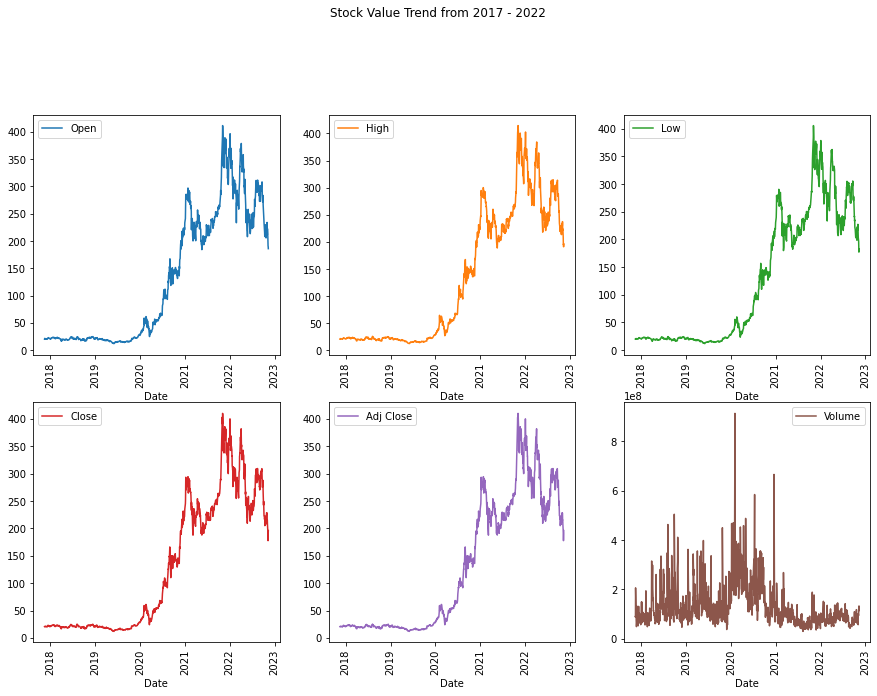

In [10]:
#Now we will plot the data using the matplotlib library.
df.plot(x = "Date", y = Column_list, subplots = True, layout = (3, 3), figsize = (15, 15), sharex = False, title = "Stock Value Trend from 2017 - 2022", rot = 90)

/Users/anmolthadani/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/anmolthadani/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/anmolthadani/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level func

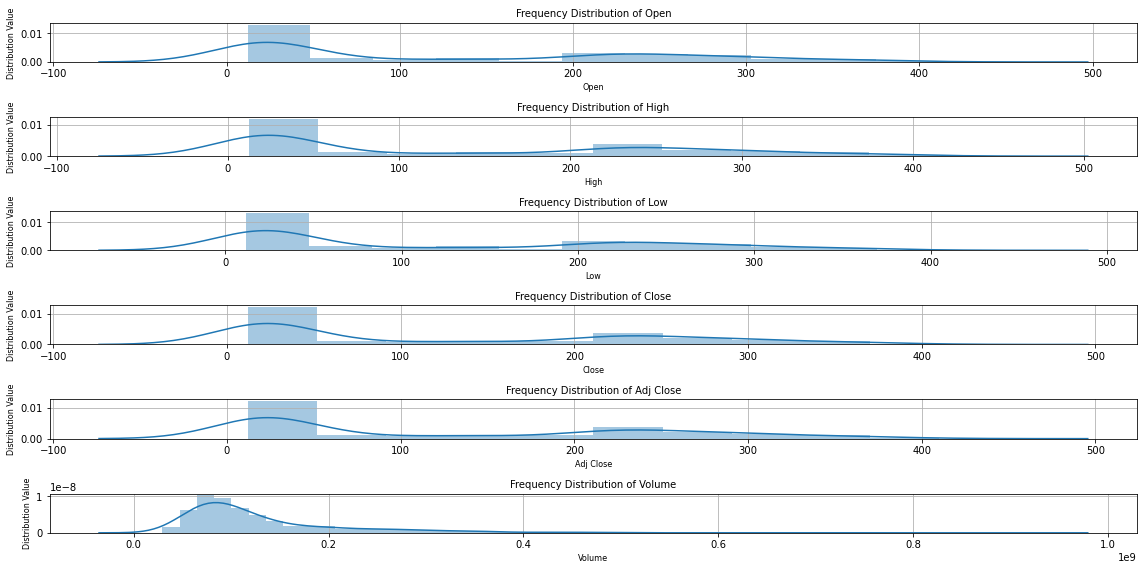

In [11]:
#Let's see how spread the data is, and also the skewness, looking like through a distribution plot

fig, ax = plt.subplots(len(Column_list), figsize = (16, 8))

for i, col_list in enumerate(Column_list):
    sns.distplot(df[col_list], hist = True, ax = ax[i])
    ax[i].set_title ("Frequency Distribution of" + " " + col_list, fontsize = 10)
    ax[i].set_xlabel (col_list, fontsize = 8)
    ax[i].set_ylabel ('Distribution Value', fontsize = 8)
    fig.tight_layout (pad = 1.1) 
    ax[i].grid('on')

<AxesSubplot:>

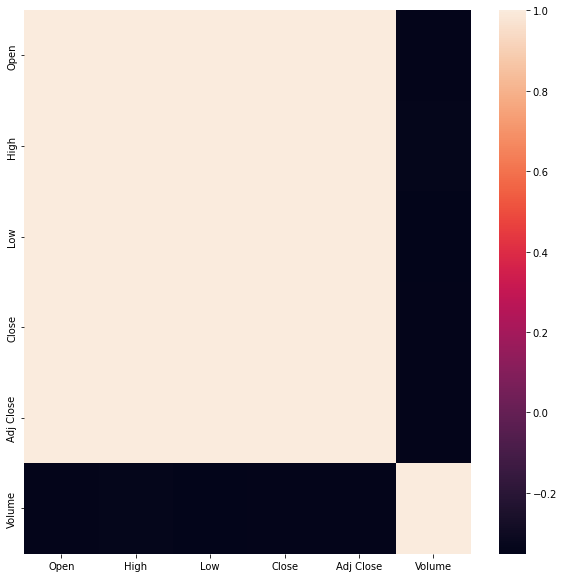

In [12]:
# Investigating for factors responsible in overall volume trade
fig, ax = plt.subplots (figsize = (10, 10))

# Perform default correlation using Pearson Method 
correlation_matrix = df.corr() 

# Plot the correlation matrix in a heatmap to understand the data better
sns.heatmap(correlation_matrix, xticklabels = correlation_matrix.columns.values, yticklabels = correlation_matrix.columns.values)

In [13]:
# View the matrix in a table format so as to identify the numerical values of strengths
correlation_matrix

,Open,High,Low,Close,Adj Close,Volume
Open,1.00,1.00,1.00,1.00,1.00,-0.35
High,1.00,1.00,1.00,1.00,1.00,-0.34
Low,1.00,1.00,1.00,1.00,1.00,-0.35
Close,1.00,1.00,1.00,1.00,1.00,-0.34
Adj Close,1.00,1.00,1.00,1.00,1.00,-0.34
Volume,-0.35,-0.34,-0.35,-0.34,-0.34,1.00


/Users/anmolthadani/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/anmolthadani/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/anmolthadani/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpr

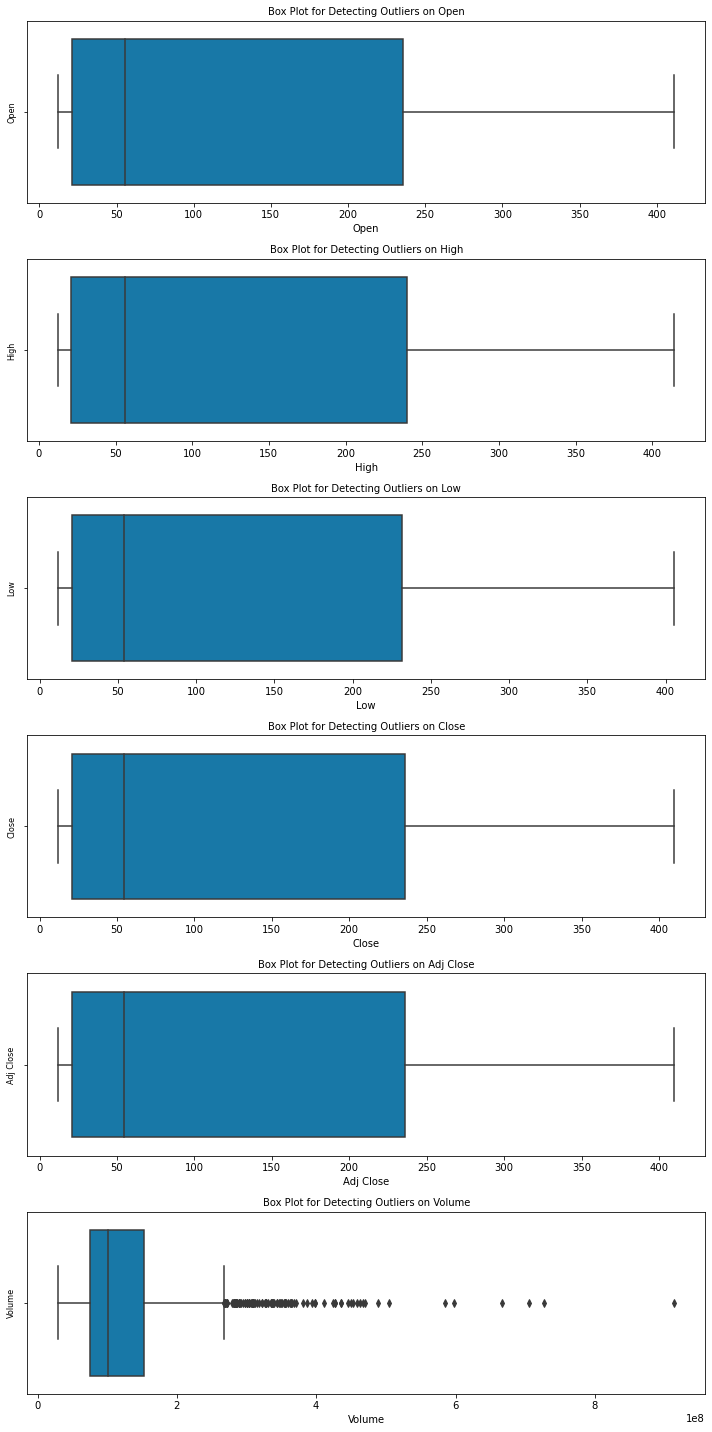

In [14]:
# Generate box plots to detect the presence of any outliers
fig, ax = plt.subplots (len(Column_list), figsize = (10, 20))

for i, col_list in enumerate(Column_list):
    sns.boxplot(df[col_list], ax = ax[i], palette = "winter", orient = 'h')
    ax[i].set_title("Box Plot for Detecting Outliers on" + " " + col_list, fontsize = 10)
    ax[i].set_ylabel(col_list, fontsize = 8)
    fig.tight_layout(pad = 1.1)

As shown in the box plot above, it is quite evident from the box plots that there are some outliers in all the variables


In [15]:
# Remove the variables either using IQR technique or Z-Score
Descriptive_Statistics = df.describe()

# Convert into a dataframe
Descriptive_Statistics = Descriptive_Statistics.T 

# Extract the IQR values 
Descriptive_Statistics['IQR'] = Descriptive_Statistics['75%'] - Descriptive_Statistics['25%']

# In this scenario, the outliers are removed using Z-Score due to the variability in historical data
df = df[(np.abs(stats.zscore(df[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']])) < 3).all(axis = 1)] 

# As we have eliminated some rows, we would have to reset the dataframe
df = df.reset_index() 

In [16]:
Descriptive_Statistics['IQR']

Open             214.78
High             218.79
Low              210.84
Close            215.28
Adj Close        215.28
Volume      77115000.00
Name: IQR, dtype: float64

In [17]:
df

,index,Date,Open,High,Low,Close,Adj Close,Volume
0,0,2017-11-15,20.40,20.83,20.10,20.75,20.75,89680500
1,1,2017-11-16,20.93,21.21,20.75,20.83,20.83,87331500
2,2,2017-11-17,21.71,21.78,20.88,21.00,21.00,206026500
3,3,2017-11-20,20.92,21.03,20.32,20.58,20.58,123715500
4,4,2017-11-21,20.72,21.22,20.58,21.19,21.19,108919500
...,...,...,...,...,...,...,...,...
1231,1252,2022-11-07,208.65,208.90,196.66,197.08,197.08,93916500
1232,1253,2022-11-08,194.02,195.20,186.75,191.30,191.30,128803400
1233,1254,2022-11-09,190.78,195.89,177.12,177.59,177.59,127062700
1234,1255,2022-11-10,189.90,191.00,180.03,190.72,190.72,132703000


Since the dataframe is a time series data, we should be able to predict the future price through forecasting techniques

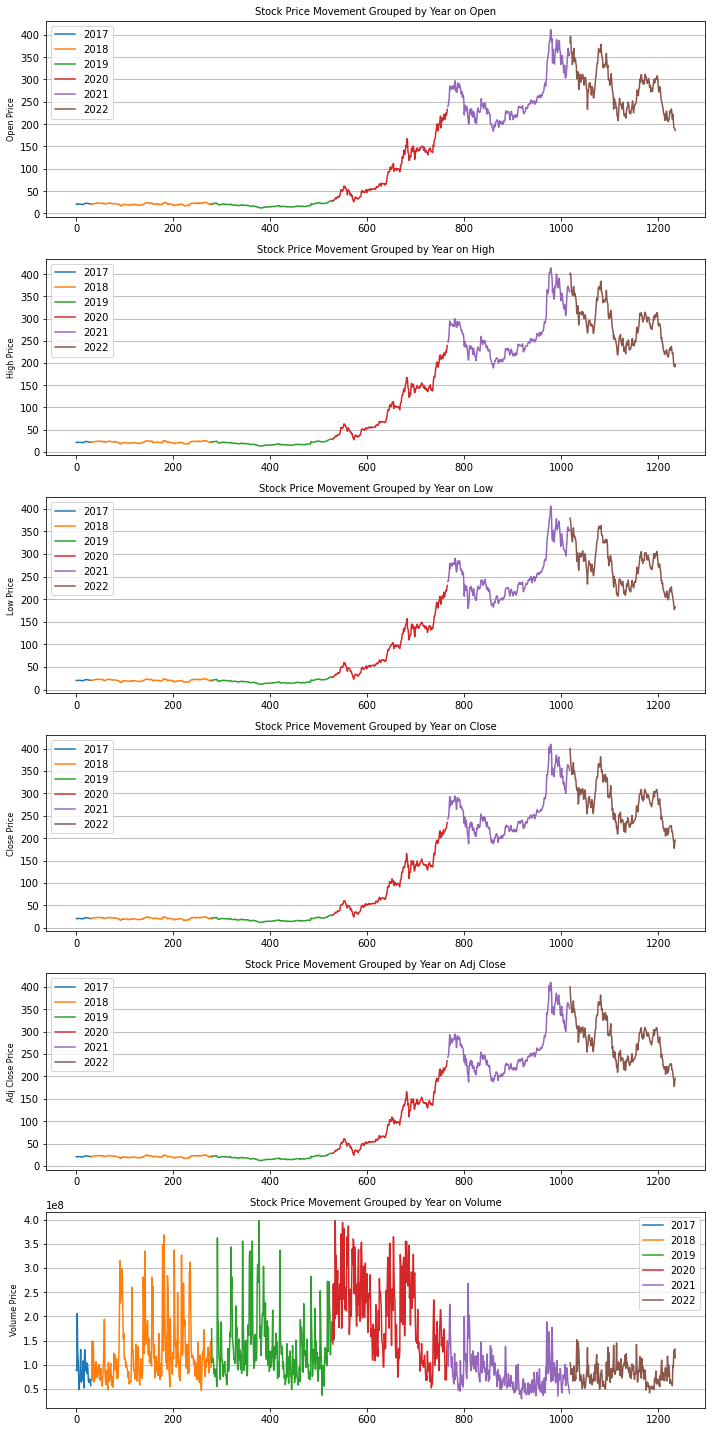

In [18]:
# Decomposing the time series data year-wise and month-wise to analyse further
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Weekday'] = df['Date'].dt.weekday

# Firstly, plot the data year-wise to see the duration of when it hiked and dipped
fig, ax = plt.subplots(len(Column_list), figsize = (10, 20))

# Grouping and plotting the data by year
for i, col_list in enumerate(Column_list):
    df.groupby('Year')[col_list].plot(ax = ax[i], legend = True)
    ax[i].set_title("Stock Price Movement Grouped by Year on" + " " + col_list, fontsize = 10)
    ax[i].set_ylabel(col_list + " " + "Price", fontsize = 8)
    fig.tight_layout(pad = 1.1)
    ax[i].yaxis.grid(True) 


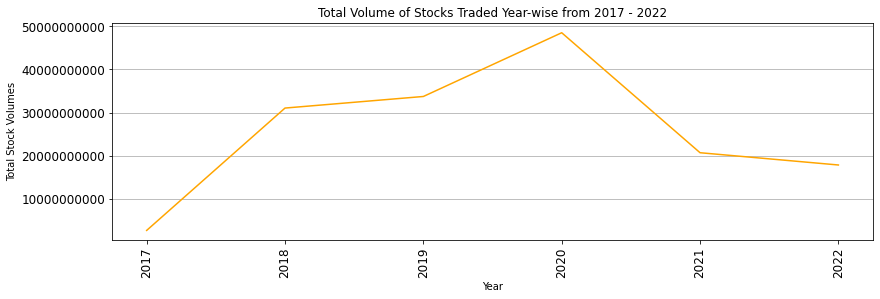

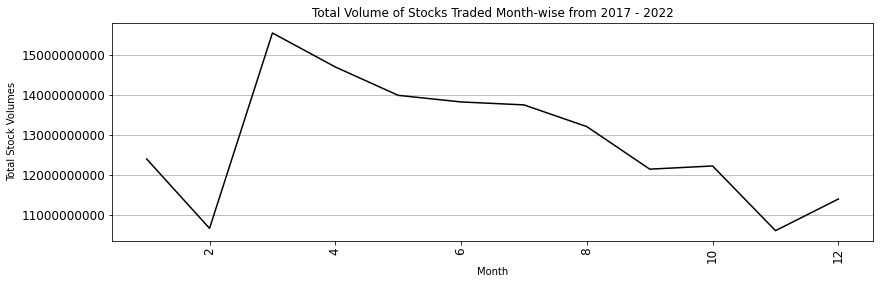

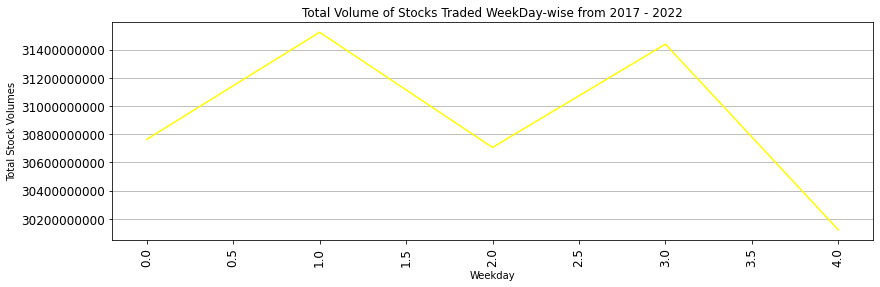

In [19]:
# Visualzing only the total volume of stocks traded grouped according to the year
check = df.groupby('Year')['Volume'].sum()
plt.figure(figsize = (30, 4))
ax1 = plt.subplot(121)
check.plot(y = "Volume", legend = False, fontsize = 12, sharex = False, title = "Total Volume of Stocks Traded Year-wise from 2017 - 2022", rot = 90, color = "orange")
ax1.ticklabel_format(useOffset = False, style = 'plain')
ax1.set_ylabel("Total Stock Volumes")
ax1.yaxis.grid(True)

# Visualzing only the total volume of stocks traded grouped according to month
check = df.groupby('Month')['Volume'].sum()
plt.figure(figsize = (30, 4))
ax1 = plt.subplot(121)
check.plot(y = "Volume", legend = False, fontsize = 12, sharex = False, title = "Total Volume of Stocks Traded Month-wise from 2017 - 2022", rot = 90, color = "black")
ax1.ticklabel_format(useOffset = False, style = 'plain')
ax1.set_ylabel("Total Stock Volumes")
ax1.yaxis.grid(True)

# Visualzing only the total volume of stocks traded grouped according to weekday
check = df.groupby('Weekday')['Volume'].sum()
plt.figure(figsize = (30, 4))
ax1 = plt.subplot(121)
check.plot(y = "Volume", legend = False, fontsize = 12, sharex = False, title = "Total Volume of Stocks Traded WeekDay-wise from 2017 - 2022", rot = 90, color = "yellow")
ax1.ticklabel_format(useOffset = False, style = 'plain')
ax1.set_ylabel("Total Stock Volumes")
ax1.yaxis.grid(True)

<AxesSubplot:title={'center':'Time Series Influence on Total Volume Trade by Year'}, ylabel='Volume'>

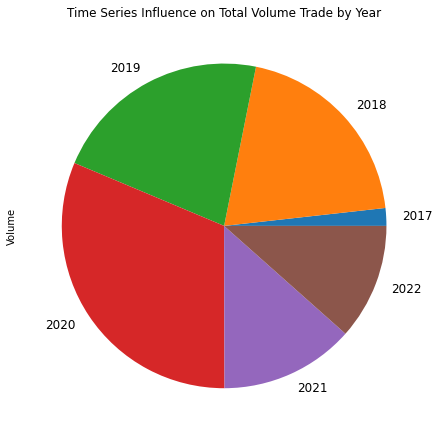

In [20]:
# Analyse based on Year
for i, col_list in enumerate(Column_list):
    var = df.groupby('Year')[col_list].sum()
    
# Convert the variable into a pandas dataframe
var = pd.DataFrame(var)

# Plot to understand the trend
plt.figure(figsize = (16, 8))
ax1 = plt.subplot(121)
var.plot(kind = "pie", y = "Volume", legend = False, fontsize = 12, sharex = False, title = "Time Series Influence on Total Volume Trade by Year", ax = ax1)

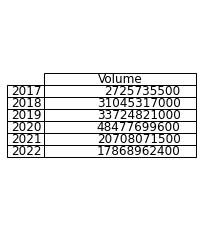

In [21]:
# Plot the table to identify numbers
ax2 = plt.subplot(122)
plt.axis('off')
tbl = table(ax2, var, loc = 'center')
tbl.auto_set_font_size(False)
tbl.set_fontsize(12)
plt.show()

<AxesSubplot:title={'center':'Time Series Influence on Total Volume Trade by Month'}, ylabel='Volume'>

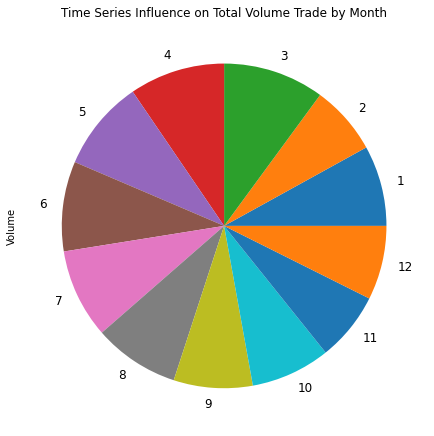

In [22]:
# Analyse based on Month
for i, col_list in enumerate(Column_list):
    var = df.groupby('Month')[col_list].sum()
    
# Convert the variable into a pandas dataframe
var = pd.DataFrame(var)

# Plot to understand the trend
plt.figure(figsize = (16, 8))
ax1 = plt.subplot(121)
var.plot(kind = "pie", y = "Volume", legend = False, fontsize = 12, sharex = False, title = "Time Series Influence on Total Volume Trade by Month", ax = ax1)

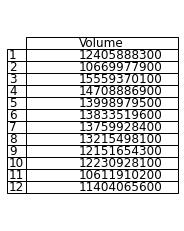

In [23]:
# Plot the table to identify numbers
ax2 = plt.subplot(122)
plt.axis('off') 
tbl = table(ax2, var, loc = 'center')
tbl.auto_set_font_size(False)
tbl.set_fontsize(12)
plt.show()

<AxesSubplot:title={'center':'Time Series Influence on Total Volume Trade by Weekday'}, ylabel='Volume'>

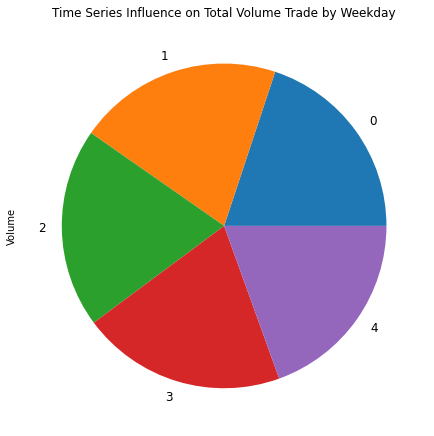

In [24]:
# Analyse based on Weekday
for i, col_list in enumerate(Column_list):
    var = df.groupby('Weekday')[col_list].sum()
    
# Convert the variable into a pandas dataframe
var = pd.DataFrame(var)

# Plot to understand the trend
plt.figure(figsize = (16, 8))
ax1 = plt.subplot(121)
var.plot(kind = "pie", y = "Volume", legend = False, fontsize = 12, sharex = False, title = "Time Series Influence on Total Volume Trade by Weekday", ax = ax1)

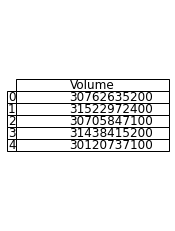

In [25]:
# Plot the table to identify numbers
ax2 = plt.subplot(122)
plt.axis('off') # Since we are plotting the table
tbl = table(ax2, var, loc = 'center')
tbl.auto_set_font_size(False)
tbl.set_fontsize(12)
plt.show()

# Performing Sentiment Analysis

This will allow me to predict whether stock price wil increase or decrease using news headlines

In [26]:
now = dt.date.today()
now = now.strftime('%m-%d-%Y')
yesterday = dt.date.today() - dt.timedelta(days = 1)
yesterday = yesterday.strftime('%m-%d-%Y')

nltk.download('punkt')
user_agent = 'Mozilla/5.0 (Macintosh; Intel Mac OS X 13.01) Gecko/20100101 Firefox/78.0'
config = Config()
config.browser_user_agent = user_agent
config.request_timeout = 10

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/anmolthadani/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [27]:
# save the company name in a variable
company_name = input("Please input the name of the Company or a Ticker: ")
#As long as the company name is valid and not empty
if company_name != '':
    print(f'Searching for and analyzing {company_name}, Please be patient!')

    #Extract News with Google News
    googlenews = GoogleNews(start=yesterday,end=now)
    googlenews.search(company_name)
    result = googlenews.result()
    #store the results in a dataframe
    df = pd.DataFrame(result)
    print(df)

Please input the name of the Company or a Ticker: Tesla
Searching for and analyzing Tesla, Please be patient!
                                               title                    media  \
0  Tesla on trial: Autopilot and Elon Musk's $56 ...                The Verge   
1  Legal fight over Elon Musk's $56bn Tesla pay d...          Financial Times   
2     Tesla heads to court to defend Elon Musk's pay                      CNN   
3  Tesla responds to deadly car crash in China's ...                 TechNode   
4  Tesla denies that a malfunction was to blame a...                  Fortune   
5  Tesla denies brake system failure after runawa...       EL PAÍS in English   
6  Tesla Stock Hit With Twitter Jitters. Fundamen...                 Barron's   
7  Tesla's Autopilot Feature Faces Scrutiny Ahead...                  Gizmodo   
8  Tesla to hold event to mark first semi deliver...            Investing.com   
9  Buying a Tesla? How to know if an electric car...  San Francisco Chronicle   

In [28]:
try:
    list =[]  
    for i in df.index:
        dict = {} 
        article = Article(df['link'][i],config=config) 
        try:
          article.download()  
          article.parse() 
          article.nlp() 
        except:
           pass 
        #storing results in our empty dictionary
        dict['Date']=df['date'][i] 
        dict['Media']=df['media'][i]
        dict['Title']=article.title
        dict['Article']=article.text
        dict['Summary']=article.summary
        dict['Key_words']=article.keywords
        list.append(dict)
    check_empty = not any(list)
    if check_empty == False:
      news_df=pd.DataFrame(list) 
      print(news_df)

except Exception as e:
    print("exception occurred:" + str(e))
    print('Looks like there is some error in retrieving the data, Please try again or input a different stock symbol.' )

          Date                    Media  \
0  9 hours ago                The Verge   
1  8 hours ago          Financial Times   
2  5 hours ago                      CNN   
3  1 hours ago                 TechNode   
4  9 hours ago                  Fortune   
5  5 hours ago       EL PAÍS in English   
6  4 hours ago                 Barron's   
7  8 hours ago                  Gizmodo   
8  4 hours ago            Investing.com   
9  8 hours ago  San Francisco Chronicle   

                                               Title  \
0  Tesla on trial: Autopilot and Elon Musk’s $56 ...   
1                                  Subscribe to read   
2     Tesla heads to court to defend Elon Musk’s pay   
3  Tesla responds to deadly car crash in China’s ...   
4  Tesla denies malfunction to blame after a dead...   
5  Tesla denies brake system failure after runawa...   
6  Tesla Stock Hit With Twitter Jitters. Fundamen...   
7  Tesla's Autopilot Feature Faces Scrutiny Ahead...   
8                     

Positive Sentiment: 6.00
Neutral Sentiment: 1.00
Negative Sentiment: 3.00


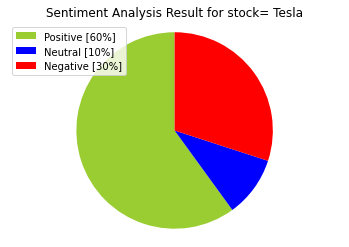

Wordcloud for Tesla


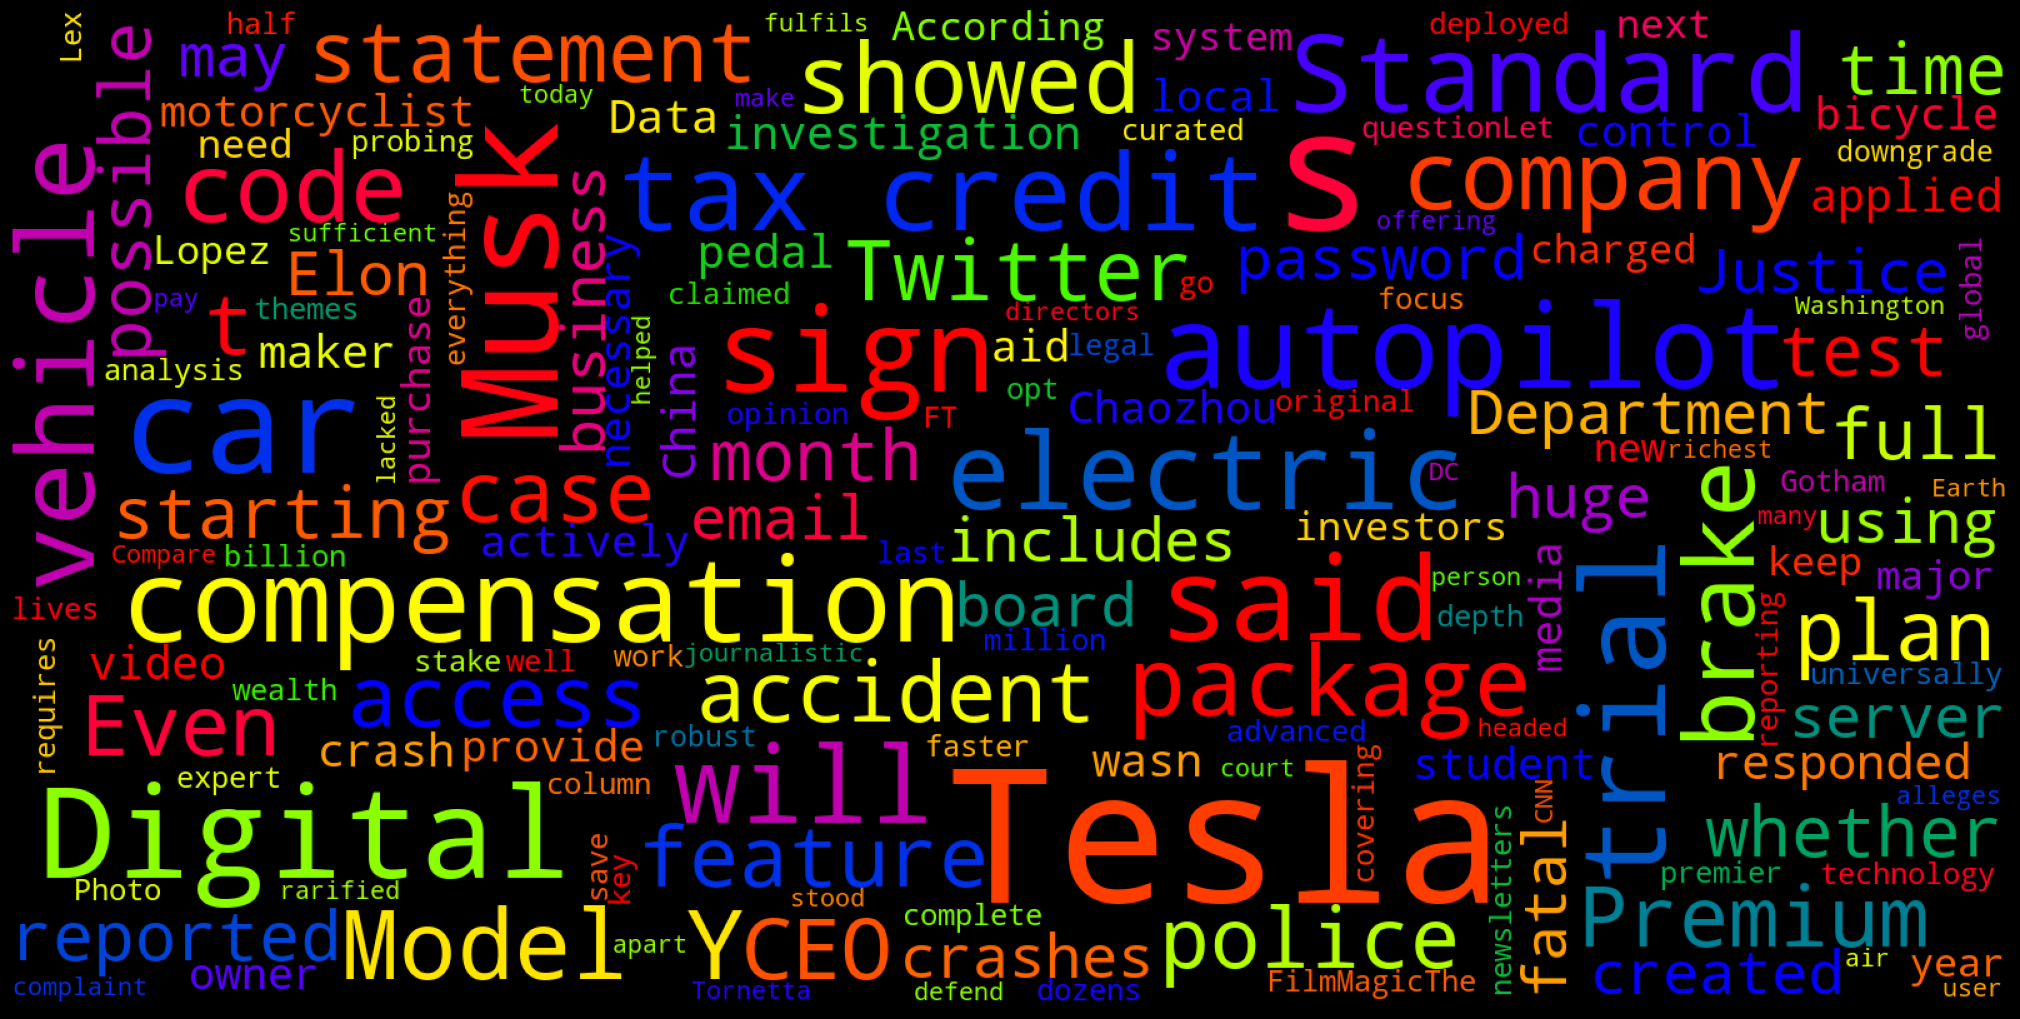

In [29]:
def percentage(part,whole):
    return 100 * float(part)/float(whole)

#Assigning Initial Values
positive = 0
negative = 0
neutral = 0

#Creating empty lists
news_list = []
neutral_list = []
negative_list = []
positive_list = []

#Iterating over the tweets in the dataframe
for news in news_df['Summary']:
    news_list.append(news)
    analyzer = SentimentIntensityAnalyzer().polarity_scores(news)
    neg = analyzer['neg']
    neu = analyzer['neu']
    pos = analyzer['pos']
    comp = analyzer['compound']

    if neg > pos:
        negative_list.append(news) 
        negative += 1 
    elif pos > neg:
        positive_list.append(news) 
        positive += 1 
    elif pos == neg:
        neutral_list.append(news) 
        neutral += 1 

positive = percentage(positive, len(news_df)) 
negative = percentage(negative, len(news_df))
neutral = percentage(neutral, len(news_df))

#Converting the lists to a pandas dataframe
news_list = pd.DataFrame(news_list)
neutral_list = pd.DataFrame(neutral_list)
negative_list = pd.DataFrame(negative_list)
positive_list = pd.DataFrame(positive_list)
print("Positive Sentiment:", '%.2f' % len(positive_list), end='\n')
print("Neutral Sentiment:", '%.2f' % len(neutral_list), end='\n')
print("Negative Sentiment:", '%.2f' % len(negative_list), end='\n')


labels = ['Positive ['+str(round(positive))+'%]' , 'Neutral ['+str(round(neutral))+'%]','Negative ['+str(round(negative))+'%]']
sizes = [positive, neutral, negative]
colors = ['yellowgreen', 'blue','red']
patches, texts = plt.pie(sizes,colors=colors, startangle=90)
plt.style.use('default')
plt.legend(labels)
plt.title("Sentiment Analysis Result for stock= "+company_name+"" )
plt.axis('equal')
plt.show()


def word_cloud(text):
    stopwords = set(STOPWORDS)
    allWords = ' '.join([nws for nws in text])
    wordCloud = WordCloud(background_color='black',width = 1600, height = 800,stopwords = stopwords,min_font_size = 20,max_font_size=150,colormap='prism').generate(allWords)
    fig, ax = plt.subplots(figsize=(20,10), facecolor='k')
    plt.imshow(wordCloud)
    ax.axis("off")
    fig.tight_layout(pad=0)
    plt.show()

print('Wordcloud for ' + company_name)
word_cloud(news_df['Summary'].values)

In [30]:
news_df.head()

,Date,Media,Title,Article,Summary,Key_words
0,9 hours ago,The Verge,Tesla on trial: Autopilot and Elon Musk’s $56 ...,"As if he doesn’t have enough going on, Elon Mu...",Photo by Gotham / FilmMagicThe $56 billion que...,"[billion, test, musk, cases, teslas, technolog..."
1,8 hours ago,Financial Times,Subscribe to read,What is included in my trial?\n\nDuring your t...,During your trial you will have complete digit...,"[subscribe, standard, plan, settings, end, acc..."
2,5 hours ago,CNN,Tesla heads to court to defend Elon Musk’s pay,"Washington, DC CNN —\n\nTesla headed to court ...","Washington, DC CNN —Tesla headed to court toda...","[heads, billion, musk, plan, pay, defend, musk..."
3,1 hours ago,TechNode,Tesla responds to deadly car crash in China’s ...,Sign In\n\nWe've recently sent you an authenti...,"Get a code sent to your email to sign in, or s...","[processor, responded, drivers, message, relat..."
4,9 hours ago,Fortune,Tesla denies malfunction to blame after a dead...,Tesla Inc. said it will assist a police invest...,Tesla Inc. said it will assist a police invest...,"[caught, video, crash, showed, teslas, malfunc..."


# Performing Time Series Analysis

In [31]:
df = pd.read_csv('/Users/anmolthadani/Desktop/Machine Learning Project/data/TSLA.csv')

In [32]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-11-15,20.40,20.83,20.10,20.75,20.75,89680500
1,2017-11-16,20.93,21.21,20.75,20.83,20.83,87331500
2,2017-11-17,21.71,21.78,20.88,21.00,21.00,206026500
3,2017-11-20,20.92,21.03,20.32,20.58,20.58,123715500
4,2017-11-21,20.72,21.22,20.58,21.19,21.19,108919500
...,...,...,...,...,...,...,...
1252,2022-11-07,208.65,208.90,196.66,197.08,197.08,93916500
1253,2022-11-08,194.02,195.20,186.75,191.30,191.30,128803400
1254,2022-11-09,190.78,195.89,177.12,177.59,177.59,127062700
1255,2022-11-10,189.90,191.00,180.03,190.72,190.72,132703000


In [33]:
df_1 = pd.DataFrame()
df_1['Close'] = df['Close'].rolling(window=10).mean()
df_2 = pd.DataFrame()
df_2['Close'] = df['Close'].rolling(window=20).mean()
df_3 = pd.DataFrame()
df_3['Close'] = df['Close'].rolling(window=30).mean()
df_4 = pd.DataFrame()
df_4['Close'] = df['Close'].rolling(window=40).mean()

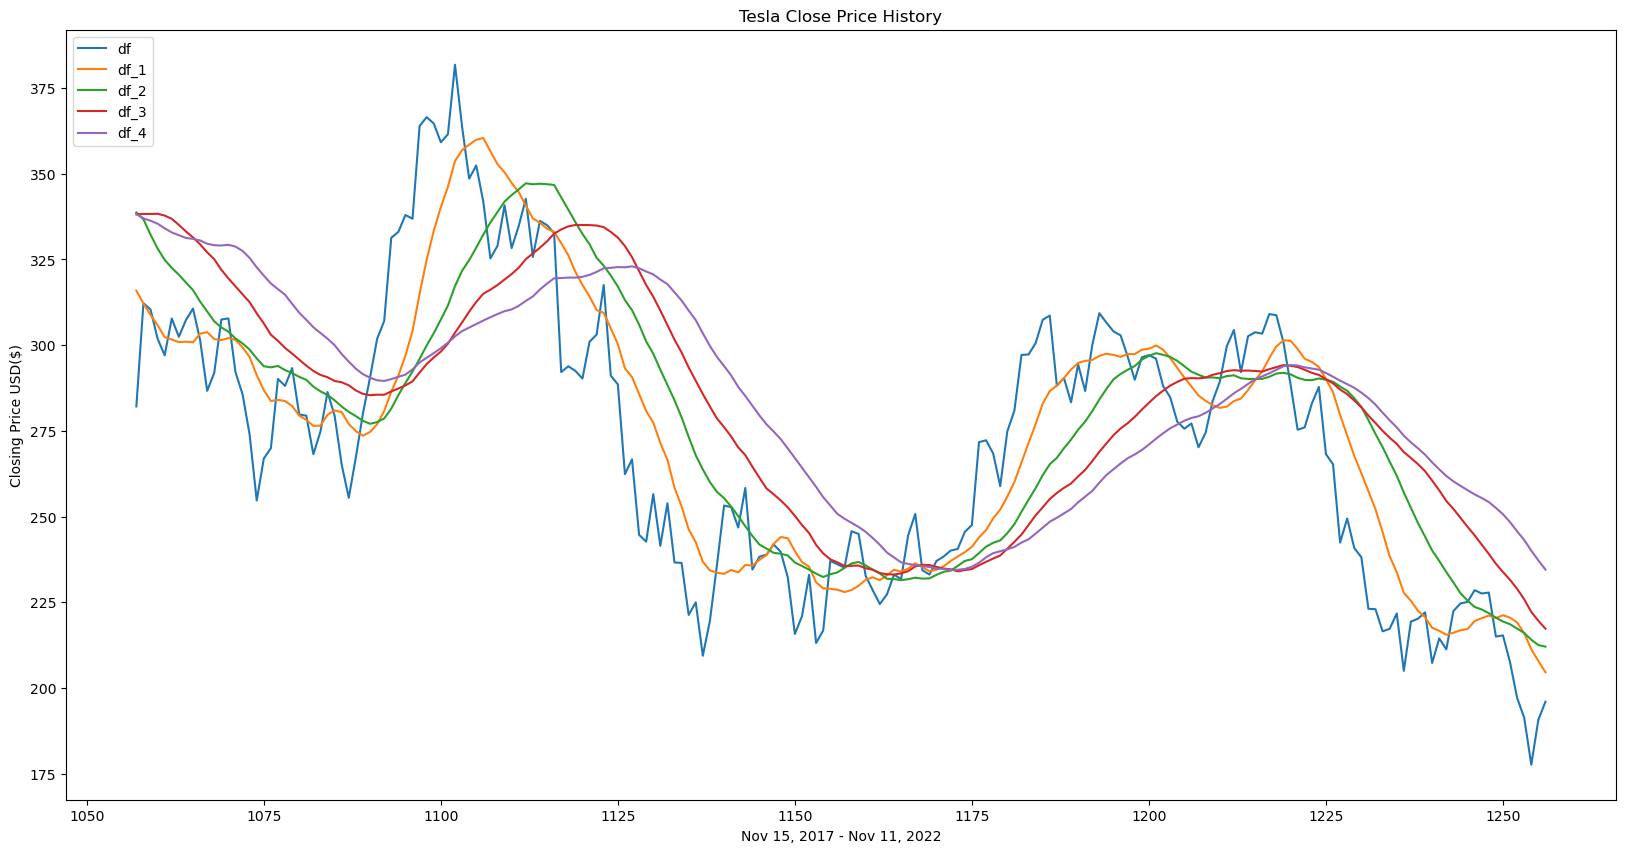

In [34]:
#Visualizing the data
plt.figure(figsize=(20,10))
plt.plot(df['Close'].tail(200), label='df')
plt.plot(df_1['Close'].tail(200), label='df_1')
plt.plot(df_2['Close'].tail(200), label='df_2')
plt.plot(df_3['Close'].tail(200), label='df_3')
plt.plot(df_4['Close'].tail(200), label='df_4')
plt.title('Tesla Close Price History')
plt.xlabel('Nov 15, 2017 - Nov 11, 2022')
plt.ylabel('Closing Price USD($)')
plt.legend(loc='upper left')
plt.show()

In [35]:
# Creating a new dataframe with only the 'Close column
new_df = df.filter(['Close'])
new_df.head()

,Close
0,20.75
1,20.83
2,21.00
3,20.58
4,21.19


In [36]:
#Converting the dataframe to a numpy array
new_dataset = new_df.values

In [37]:
#Extraction of the number of rows to train the model on
closing_price = df['Close']
values = closing_price.values
training_len = math.ceil(len(new_dataset)*.5)
training_len

629

In [38]:
# Scaling the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(new_dataset)

scaled_data

array([[0.02216367],
       [0.02236466],
       [0.02279175],
       ...,
       [0.41618736],
       [0.44917412],
       [0.46236379]])

In [39]:
scaled_data.shape

(1257, 1)

In [40]:
# Create the training data set
training_data = scaled_data[0:training_len,:]

# Spliting the data into train and test
x_train = []
y_train = []

for i in range(60, len(training_data)):
    x_train.append(training_data[i-60:i,0])
    y_train.append(training_data[i,0])
    
    if i<=61:
        print(x_train)
        print(y_train)
        print()

[array([0.02216367, 0.02236466, 0.02279175, 0.02173491, 0.02325402,
       0.02238141, 0.0228755 , 0.02308654, 0.02321048, 0.02153392,
       0.02175333, 0.02136476, 0.021142  , 0.02089077, 0.02249196,
       0.02215362, 0.02280516, 0.02511314, 0.02714309, 0.02680811,
       0.02661718, 0.02754841, 0.02678132, 0.02547994, 0.02512486,
       0.02557373, 0.02449176, 0.02316693, 0.02222062, 0.02284368,
       0.02217205, 0.02370959, 0.02316023, 0.02271974, 0.02304801,
       0.0263693 , 0.02591373, 0.02609964, 0.02662723, 0.02633748,
       0.02698063, 0.02816979, 0.027736  , 0.02864881, 0.02890674,
       0.02911275, 0.02795709, 0.02657531, 0.02744792, 0.02856674,
       0.02794536, 0.02936733, 0.02851984, 0.02759866, 0.02581994,
       0.02596063, 0.02780802, 0.0228219 , 0.02201629, 0.02290565])]
[0.024233826448238436]

[array([0.02216367, 0.02236466, 0.02279175, 0.02173491, 0.02325402,
       0.02238141, 0.0228755 , 0.02308654, 0.02321048, 0.02153392,
       0.02175333, 0.02136476, 0.0

In [41]:
print(len(x_train))
print(len(y_train))

569
569


In [42]:
#Converting the x_train and y_train to numpy array
x_train, y_train = np.array(x_train), np.array(y_train)

In [43]:
#Reshaping the data
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
x_train.shape

(569, 60, 1)

In [44]:
testing_data = scaled_data[training_len-60: , : ]
x_test = []
y_test = values[training_len:]

for i in range(60, len(testing_data)):
    x_test.append(testing_data[i-60:i,0])
    
    if i<=61:
        print(x_test)
        print(y_test)
        print()

[array([0.10967443, 0.10399994, 0.10046427, 0.08374898, 0.08190494,
       0.09457206, 0.09488861, 0.09555688, 0.09137638, 0.08784909,
       0.07185734, 0.07810966, 0.07625055, 0.06391004, 0.06157693,
       0.04456853, 0.04207799, 0.03052467, 0.04164922, 0.0416308 ,
       0.04276302, 0.05460609, 0.06034255, 0.05848511, 0.05617378,
       0.0541254 , 0.05778836, 0.05068017, 0.04614292, 0.05042057,
       0.05648865, 0.06138098, 0.06194876, 0.06599527, 0.07905095,
       0.08892268, 0.0922624 , 0.09483836, 0.09629216, 0.09503097,
       0.08504199, 0.09264427, 0.08820919, 0.09147855, 0.10380566,
       0.09884299, 0.10410044, 0.10098014, 0.08748731, 0.09751481,
       0.09869058, 0.10109738, 0.10067196, 0.10726763, 0.10590596,
       0.10559108, 0.10250093, 0.10457275, 0.10387601, 0.10629788])]
[ 53.867332  54.370667  55.173332  54.458668  54.591331  54.681999
  53.720669  55.666668  59.873333  58.770668  58.863998  57.625332
  59.043999  63.327999  62.711334  68.33667   64.856003  62

# Facebook Prophet

In [45]:
df = pd.read_csv('/Users/anmolthadani/Desktop/Machine Learning Project/data/TSLA.csv')

In [46]:
df = df.reset_index()

In [47]:
df

,index,Date,Open,High,Low,Close,Adj Close,Volume
0,0,2017-11-15,20.40,20.83,20.10,20.75,20.75,89680500
1,1,2017-11-16,20.93,21.21,20.75,20.83,20.83,87331500
2,2,2017-11-17,21.71,21.78,20.88,21.00,21.00,206026500
3,3,2017-11-20,20.92,21.03,20.32,20.58,20.58,123715500
4,4,2017-11-21,20.72,21.22,20.58,21.19,21.19,108919500
...,...,...,...,...,...,...,...,...
1252,1252,2022-11-07,208.65,208.90,196.66,197.08,197.08,93916500
1253,1253,2022-11-08,194.02,195.20,186.75,191.30,191.30,128803400
1254,1254,2022-11-09,190.78,195.89,177.12,177.59,177.59,127062700
1255,1255,2022-11-10,189.90,191.00,180.03,190.72,190.72,132703000


In [48]:
df.columns

Index(['index', 'Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [49]:
df = df.filter(['Date','Close'])
df.head()

,Date,Close
0,2017-11-15,20.75
1,2017-11-16,20.83
2,2017-11-17,21.00
3,2017-11-20,20.58
4,2017-11-21,21.19


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1257 entries, 0 to 1256
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1257 non-null   object 
 1   Close   1257 non-null   float64
dtypes: float64(1), object(1)
memory usage: 19.8+ KB


In [51]:
# To filter out negative values
df.index[df['Close'] < 0]

Int64Index([], dtype='int64')

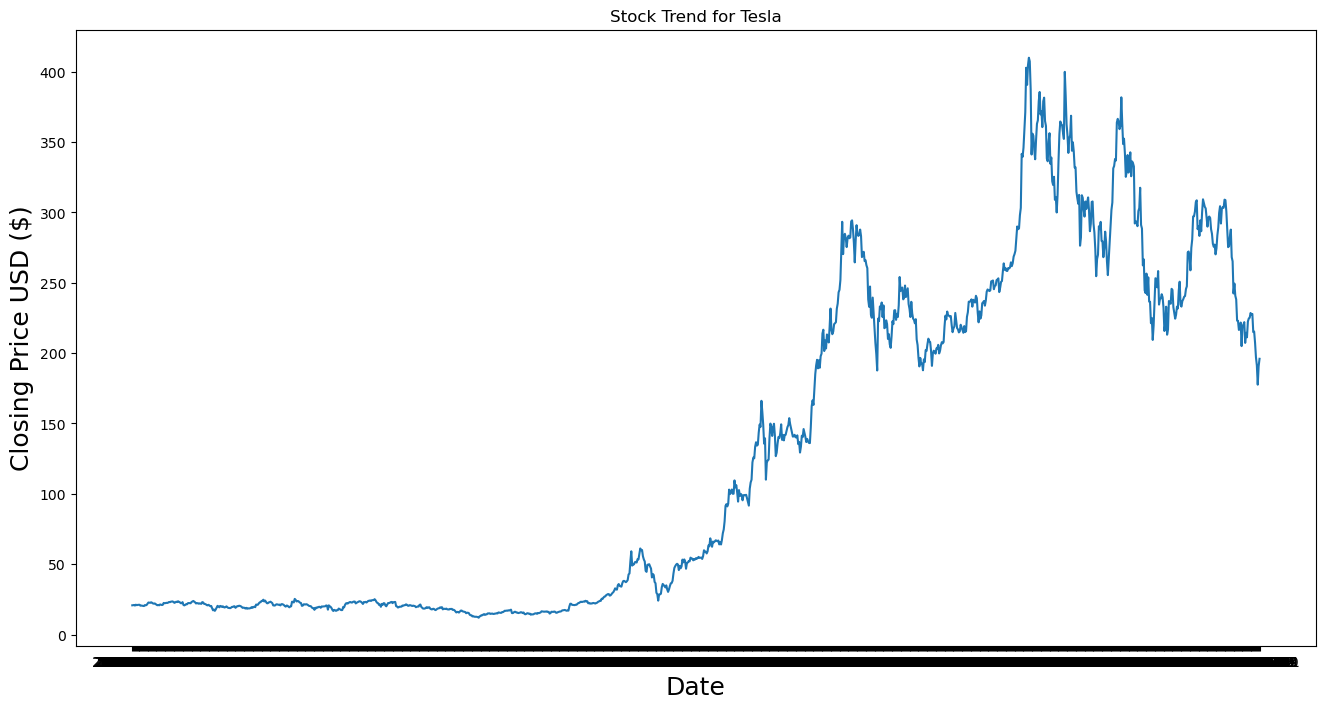

In [52]:
plt.figure(figsize=(16,8))
plt.plot(df['Date'], df['Close'])
plt.title('Stock Trend for Tesla')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Closing Price USD ($)', fontsize=18)
plt.show()

In [53]:
df['Close_shift'] = df['Close'] - df['Close'].shift(1)
y = df['Close_shift']

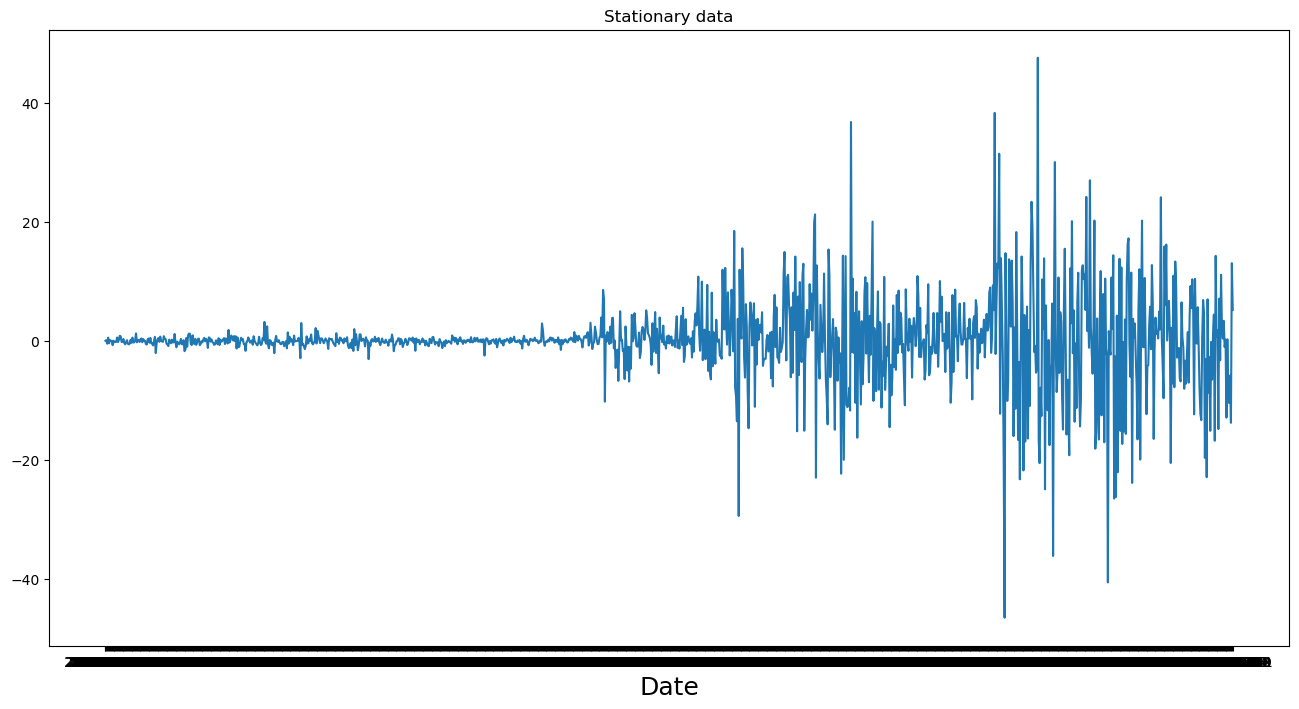

In [54]:
plt.figure(figsize=(16,8))
plt.plot(df['Date'],df['Close_shift'])
plt.title('Stationary data')
plt.xlabel('Date', fontsize=18)
plt.show()

In [55]:
model = Prophet()

In [56]:
df.columns

Index(['Date', 'Close', 'Close_shift'], dtype='object')

In [57]:
prophet_df = df.rename(columns={'Date':'ds', 'Close_shift':'y'})

In [58]:
prophet_df.head()

,ds,Close,y
0,2017-11-15,20.75,NaN
1,2017-11-16,20.83,0.08
2,2017-11-17,21.00,0.17
3,2017-11-20,20.58,-0.42
4,2017-11-21,21.19,0.60


In [59]:
#Spliting the training and test data
train_data_len = int(0.5*len(df))
train_data_len

628

In [60]:
train_df = prophet_df[:train_data_len]
test_df = prophet_df[train_data_len:]
train_df.head(), train_df.shape

(           ds  Close     y
 0  2017-11-15  20.75   NaN
 1  2017-11-16  20.83  0.08
 2  2017-11-17  21.00  0.17
 3  2017-11-20  20.58 -0.42
 4  2017-11-21  21.19  0.60,
 (628, 3))

In [61]:
model.fit(train_df)

14:56:43 - cmdstanpy - INFO - Chain [1] start processing
14:56:43 - cmdstanpy - INFO - Chain [1] done processing


In [62]:
period = len(df)-len(train_df)
period

629

In [63]:
# Creating future datas of len(df)-len(train_df) days
future_dates = model.make_future_dataframe(periods=period)

In [64]:
future_dates.shape

(1257, 1)

In [65]:
future_dates.head()

,ds
0,2017-11-15
1,2017-11-16
2,2017-11-17
3,2017-11-20
4,2017-11-21


In [66]:
#making prediction
prediction = model.predict(future_dates)

In [67]:
prediction.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2017-11-15,-0.02,-1.73,1.36,-0.02,-0.02,-0.18,-0.18,-0.18,-0.06,-0.06,-0.06,-0.13,-0.13,-0.13,0.00,0.00,0.00,-0.20
1,2017-11-16,-0.02,-1.89,1.31,-0.02,-0.02,-0.26,-0.26,-0.26,-0.12,-0.12,-0.12,-0.14,-0.14,-0.14,0.00,0.00,0.00,-0.27
2,2017-11-17,-0.02,-1.84,1.50,-0.02,-0.02,-0.32,-0.32,-0.32,-0.18,-0.18,-0.18,-0.14,-0.14,-0.14,0.00,0.00,0.00,-0.34
3,2017-11-20,-0.02,-1.63,1.63,-0.02,-0.02,-0.01,-0.01,-0.01,0.13,0.13,0.13,-0.13,-0.13,-0.13,0.00,0.00,0.00,-0.02
4,2017-11-21,-0.01,-1.65,1.57,-0.01,-0.01,0.01,0.01,0.01,0.13,0.13,0.13,-0.12,-0.12,-0.12,0.00,0.00,0.00,-0.01


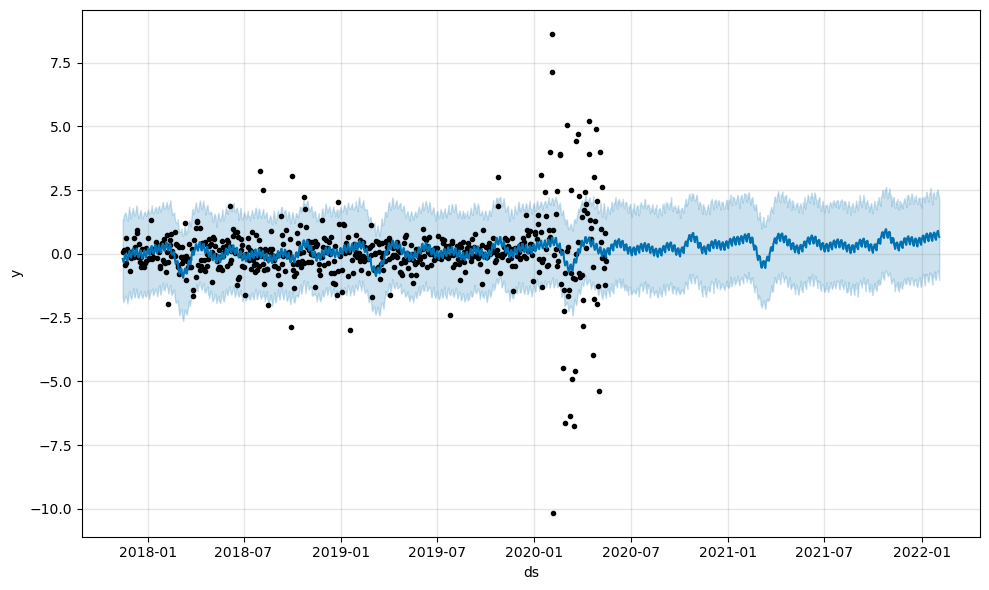

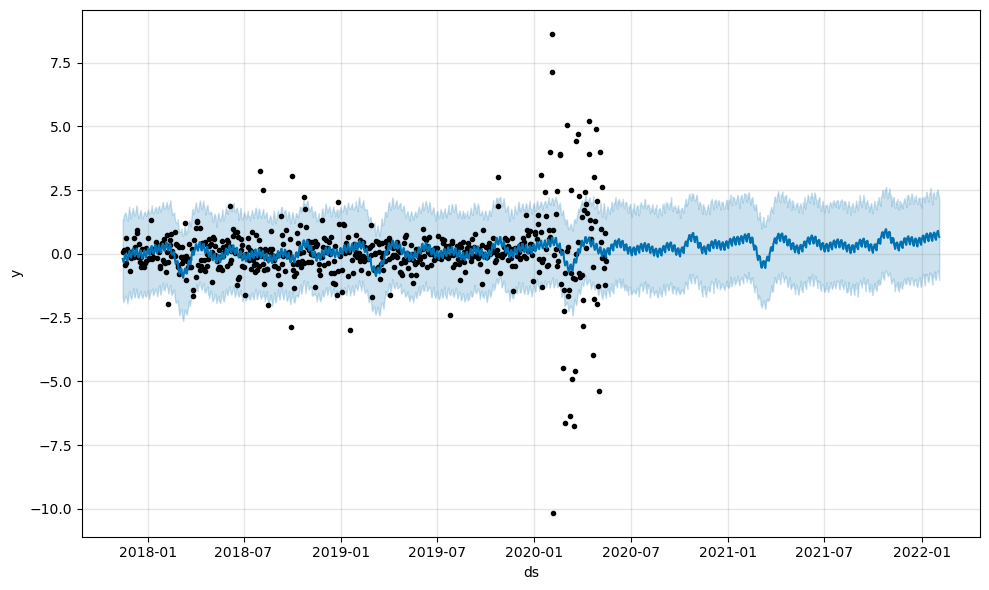

In [68]:
# Plotting our prediction data
model.plot(prediction)

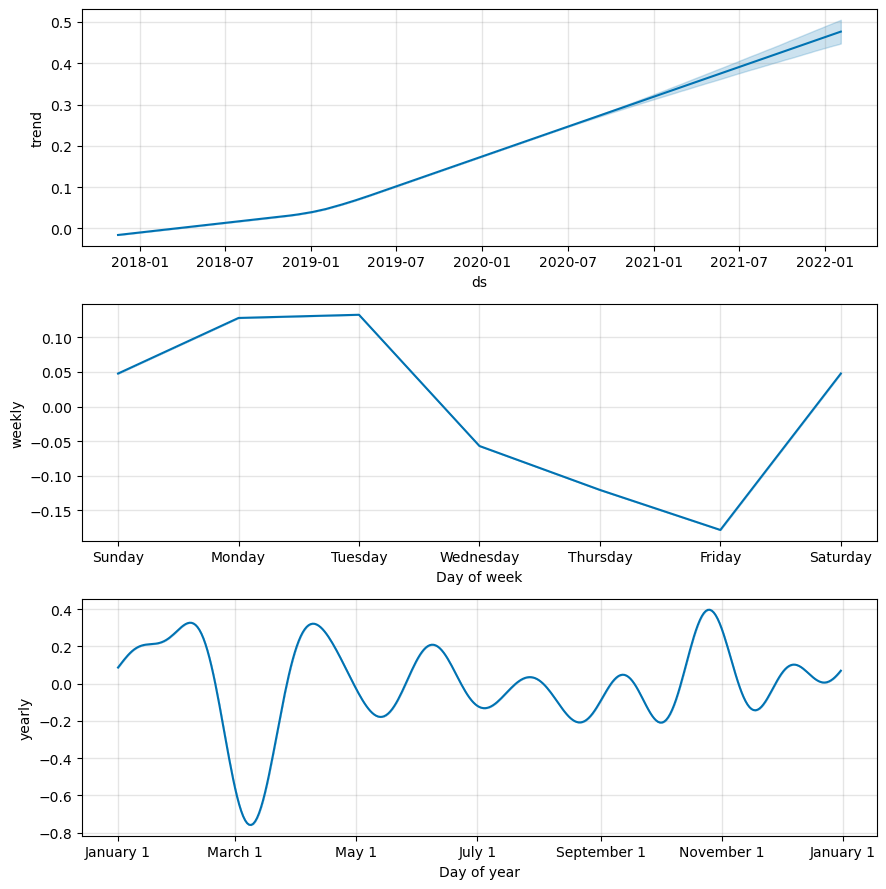

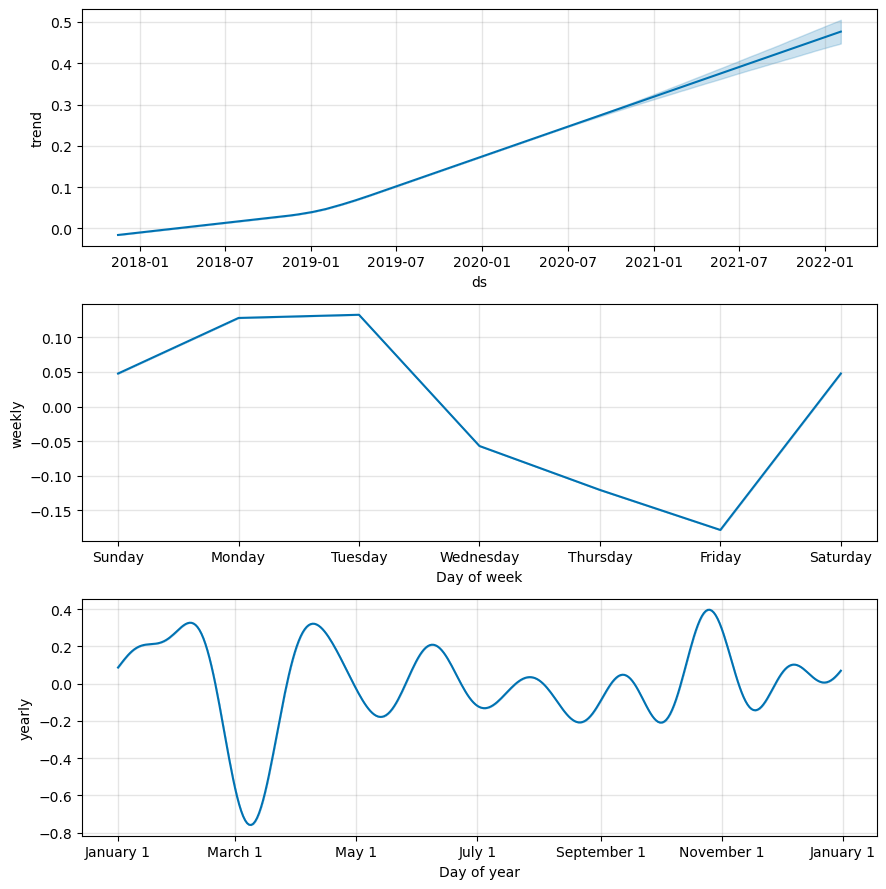

In [69]:
model.plot_components(prediction)

In [70]:
train_df.shape, len(df)-len(train_df)

((628, 3), 629)

In [71]:
cv = cross_validation(model, initial='700 days', period='1 days', horizon = '100 days')

  0%|          | 0/112 [00:00<?, ?it/s]

14:56:45 - cmdstanpy - INFO - Chain [1] start processing
14:56:45 - cmdstanpy - INFO - Chain [1] done processing
14:56:45 - cmdstanpy - INFO - Chain [1] start processing
14:56:45 - cmdstanpy - INFO - Chain [1] done processing
14:56:45 - cmdstanpy - INFO - Chain [1] start processing
14:56:45 - cmdstanpy - INFO - Chain [1] done processing
14:56:46 - cmdstanpy - INFO - Chain [1] start processing
14:56:46 - cmdstanpy - INFO - Chain [1] done processing
14:56:46 - cmdstanpy - INFO - Chain [1] start processing
14:56:46 - cmdstanpy - INFO - Chain [1] done processing
14:56:46 - cmdstanpy - INFO - Chain [1] start processing
14:56:46 - cmdstanpy - INFO - Chain [1] done processing
14:56:46 - cmdstanpy - INFO - Chain [1] start processing
14:56:46 - cmdstanpy - INFO - Chain [1] done processing
14:56:47 - cmdstanpy - INFO - Chain [1] start processing
14:56:47 - cmdstanpy - INFO - Chain [1] done processing
14:56:47 - cmdstanpy - INFO - Chain [1] start processing
14:56:47 - cmdstanpy - INFO - Chain [1]

14:57:06 - cmdstanpy - INFO - Chain [1] done processing
14:57:06 - cmdstanpy - INFO - Chain [1] start processing
14:57:06 - cmdstanpy - INFO - Chain [1] done processing
14:57:06 - cmdstanpy - INFO - Chain [1] start processing
14:57:06 - cmdstanpy - INFO - Chain [1] done processing
14:57:06 - cmdstanpy - INFO - Chain [1] start processing
14:57:06 - cmdstanpy - INFO - Chain [1] done processing
14:57:07 - cmdstanpy - INFO - Chain [1] start processing
14:57:07 - cmdstanpy - INFO - Chain [1] done processing
14:57:07 - cmdstanpy - INFO - Chain [1] start processing
14:57:07 - cmdstanpy - INFO - Chain [1] done processing
14:57:07 - cmdstanpy - INFO - Chain [1] start processing
14:57:07 - cmdstanpy - INFO - Chain [1] done processing
14:57:08 - cmdstanpy - INFO - Chain [1] start processing
14:57:08 - cmdstanpy - INFO - Chain [1] done processing
14:57:08 - cmdstanpy - INFO - Chain [1] start processing
14:57:08 - cmdstanpy - INFO - Chain [1] done processing
14:57:08 - cmdstanpy - INFO - Chain [1] 

In [72]:
cv.head(), cv.shape

(          ds  yhat  yhat_lower  yhat_upper     y     cutoff
 0 2019-10-18  0.24       -0.61        1.04 -0.33 2019-10-17
 1 2019-10-21  0.51       -0.33        1.38 -0.23 2019-10-17
 2 2019-10-22  0.52       -0.26        1.32  0.14 2019-10-17
 3 2019-10-23  0.57       -0.26        1.34 -0.06 2019-10-17
 4 2019-10-24  0.46       -0.33        1.26  3.00 2019-10-17,
 (7593, 6))

In [73]:
df_train_perform_metrics = performance_metrics(cv)

In [74]:
df_train_perform_metrics

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,10 days,3.91,1.98,0.99,2.60,1.02,1.64,0.71
1,11 days,3.89,1.97,0.99,2.59,1.03,1.64,0.71
2,12 days,3.88,1.97,0.99,2.55,1.03,1.64,0.70
3,13 days,3.90,1.98,0.99,2.46,1.03,1.63,0.70
4,14 days,3.94,1.98,1.00,2.38,1.03,1.63,0.70
...,...,...,...,...,...,...,...,...
86,96 days,9.94,3.15,2.29,1.36,0.99,1.80,0.31
87,97 days,9.93,3.15,2.29,1.37,0.99,1.80,0.31
88,98 days,9.92,3.15,2.29,1.39,0.99,1.81,0.31
89,99 days,9.91,3.15,2.29,1.40,0.99,1.81,0.31


# MSE & RMSE

In [75]:
MSE = sum(df_train_perform_metrics['mse'])/len(df_train_perform_metrics)
RMSE = sum(df_train_perform_metrics['rmse'])/len(df_train_perform_metrics)
MSE, RMSE

(7.345577441078143, 2.683795045666881)

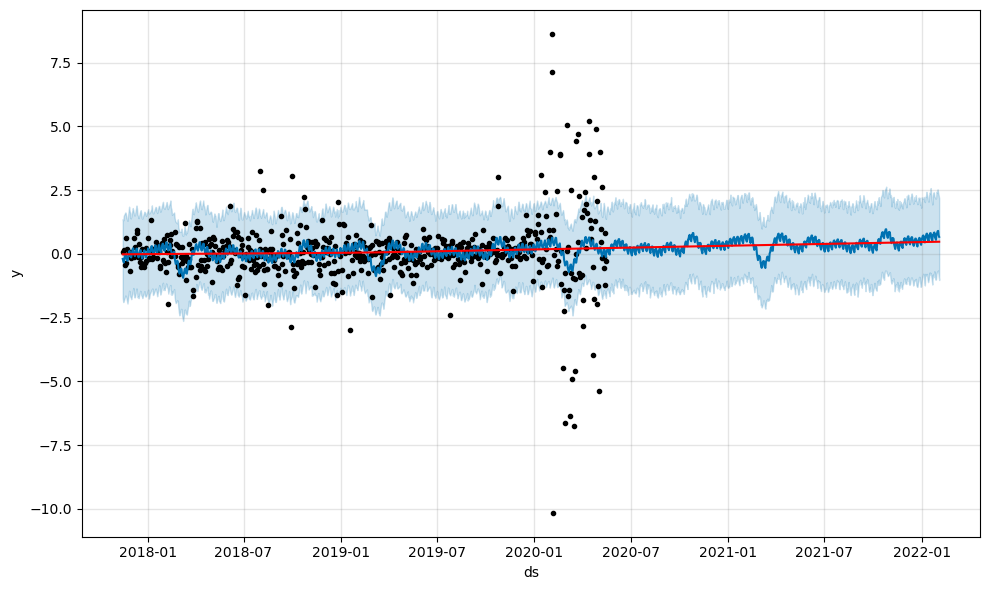

In [76]:
fig = model.plot(prediction)
a = add_changepoints_to_plot(fig.gca(), model, prediction)

/Users/anmolthadani/opt/anaconda3/lib/python3.9/site-packages/prophet/plot.py:544: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  x_plt = df_none['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])
/Users/anmolthadani/opt/anaconda3/lib/python3.9/site-packages/prophet/plot.py:545: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  x_plt_h = df_h['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])


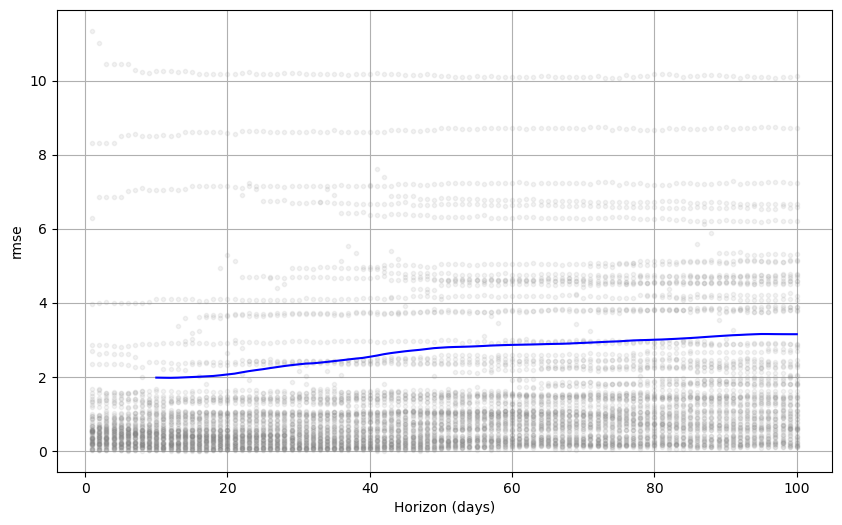

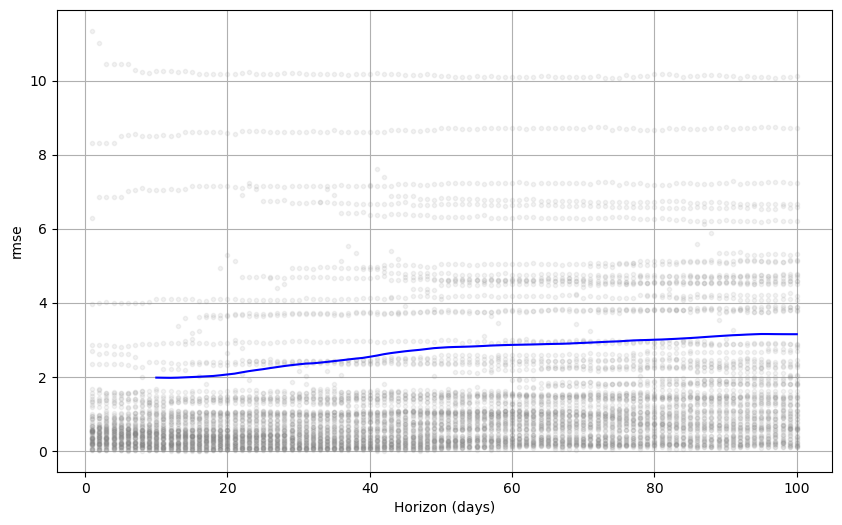

In [77]:
plot_cross_validation_metric(cv,metric='rmse')

# Using ARIMA

In [78]:
df = pd.read_csv('/Users/anmolthadani/Desktop/Machine Learning Project/data/TSLA.csv')
df= df.reset_index()
df.head()

,index,Date,Open,High,Low,Close,Adj Close,Volume
0,0,2017-11-15,20.40,20.83,20.10,20.75,20.75,89680500
1,1,2017-11-16,20.93,21.21,20.75,20.83,20.83,87331500
2,2,2017-11-17,21.71,21.78,20.88,21.00,21.00,206026500
3,3,2017-11-20,20.92,21.03,20.32,20.58,20.58,123715500
4,4,2017-11-21,20.72,21.22,20.58,21.19,21.19,108919500


In [79]:
df.columns

Index(['index', 'Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1257 entries, 0 to 1256
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   index      1257 non-null   int64  
 1   Date       1257 non-null   object 
 2   Open       1257 non-null   float64
 3   High       1257 non-null   float64
 4   Low        1257 non-null   float64
 5   Close      1257 non-null   float64
 6   Adj Close  1257 non-null   float64
 7   Volume     1257 non-null   int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 78.7+ KB


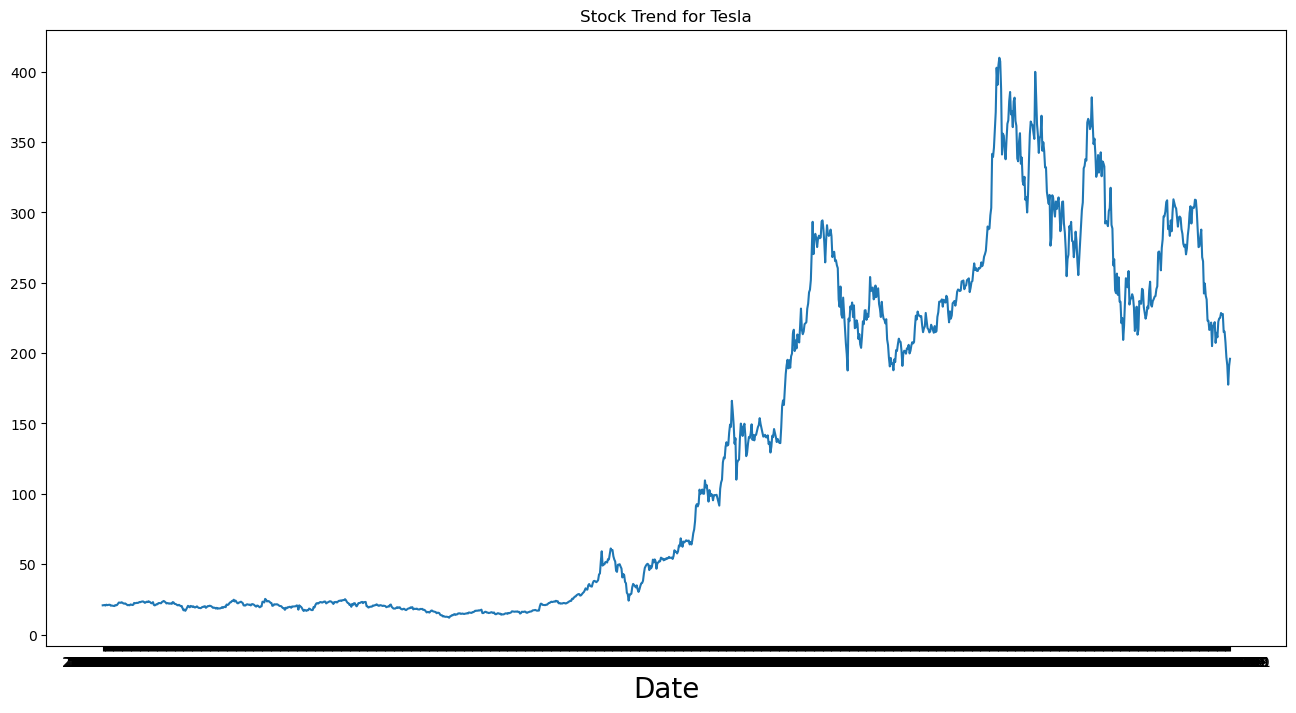

In [81]:
plt.figure(figsize=(16,8))
plt.plot(df['Date'],df['Close'])
plt.title('Stock Trend for Tesla')
plt.xlabel('Date', fontsize=20)
plt.show()

In [82]:
result = adfuller(df['Close'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -1.189121
p-value: 0.678258
Critical Values:
	1%: -3.436
	5%: -2.864
	10%: -2.568


In [83]:
df['Close_shift'] = df['Close'] - df['Close'].shift(1)

In [84]:
df['Close_shift'] = df['Close_shift'].fillna(method='bfill')
df['Close_shift']

0        0.08
1        0.08
2        0.17
3       -0.42
4        0.60
        ...  
1252   -10.39
1253    -5.78
1254   -13.71
1255    13.13
1256     5.25
Name: Close_shift, Length: 1257, dtype: float64

In [85]:
result = adfuller(df['Close_shift'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -6.573226
p-value: 0.000000
Critical Values:
	1%: -3.436
	5%: -2.864
	10%: -2.568


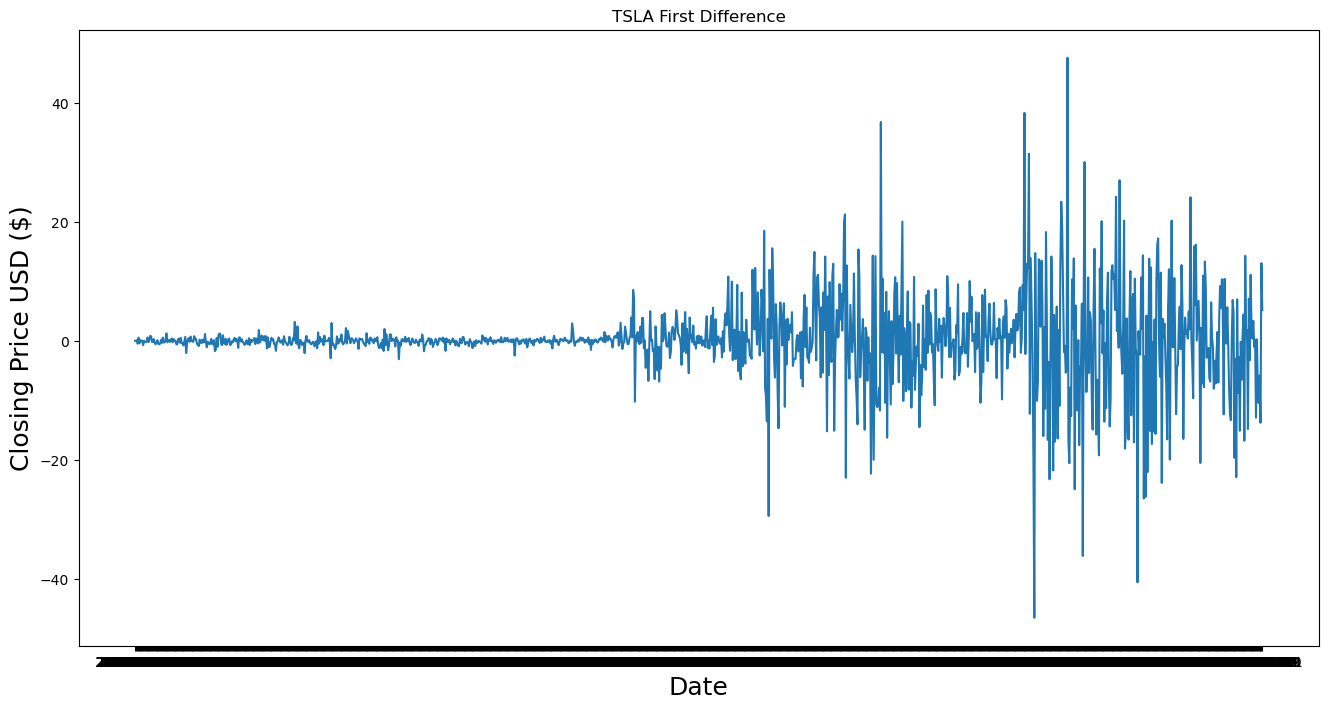

In [86]:
plt.figure(figsize=(16,8))
plt.plot(df['Date'],df['Close_shift'])
plt.title("TSLA First Difference")
plt.xlabel('Date', fontsize=18)
plt.ylabel('Closing Price USD ($)', fontsize=18)
plt.show()

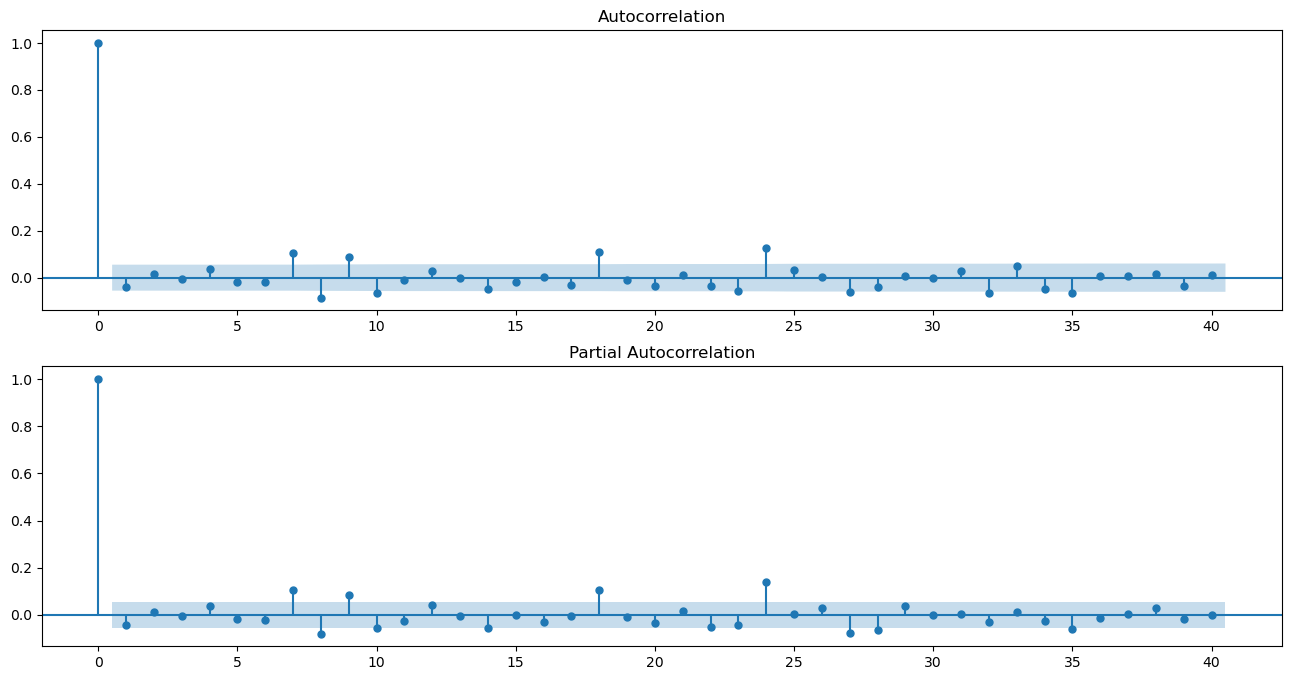

In [87]:
fig = plt.figure(figsize=(16,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Close_shift'].iloc[1:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Close_shift'].iloc[1:],lags=40,ax=ax2)

ValueError: The number of FixedLocator locations (7), usually from a call to set_ticks, does not match the number of ticklabels (5).

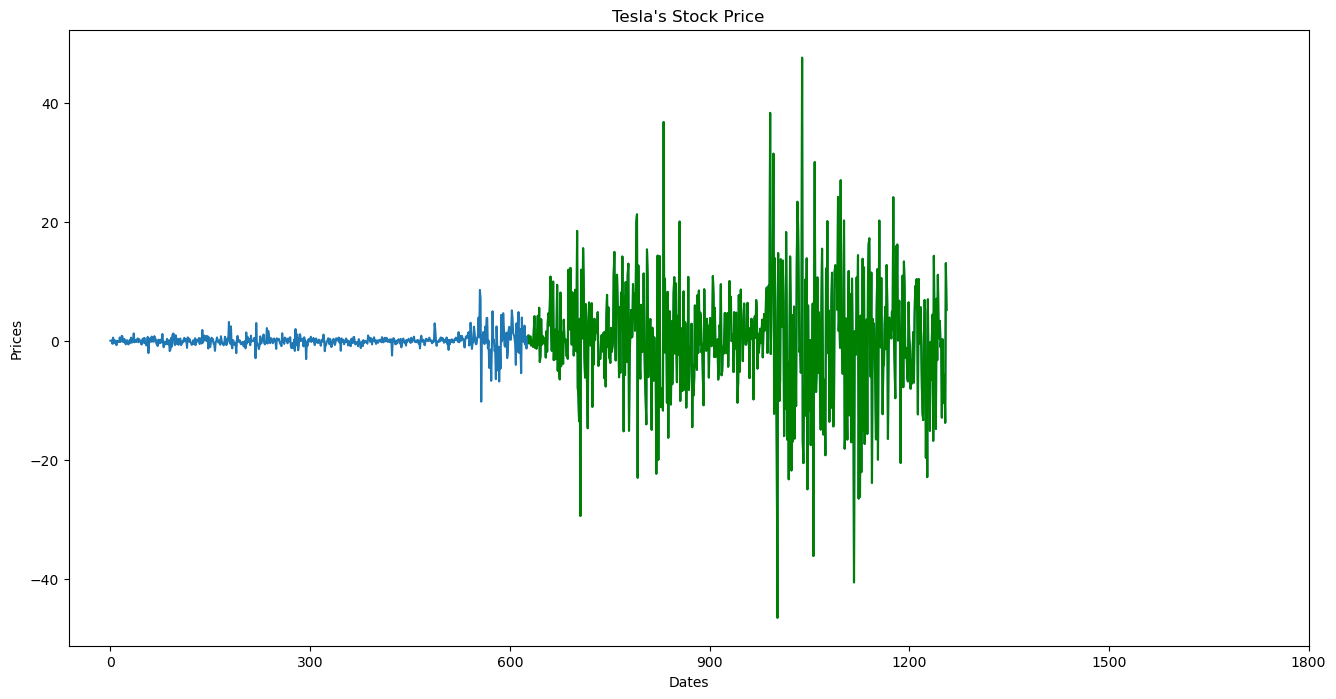

In [88]:
train_data, test_data = df[0:int(len(df)*0.5)], df[int(len(df)*0.5):]
plt.figure(figsize=(16,8))
plt.title("Tesla's Stock Price")
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.plot(df['Close_shift'], label='Training Data')
plt.plot(test_data['Close_shift'], 'green', label='Testing Data')
plt.xticks(np.arange(0,1857, 300), df['Date'][0:2000:300])
plt.legend()

In [89]:
model=ARIMA(df['Close_shift'],order=(1,0,1))
model_fit=model.fit()

/Users/anmolthadani/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.34482D+00    |proj g|=  1.99840D-05

At iterate    5    f=  3.34482D+00    |proj g|=  1.77636D-07

At iterate   10    f=  3.34482D+00    |proj g|=  8.88178D-08

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     11     17      1     0     0   0.000D+00   3.345D+00
  F =   3.3448178865008771     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


In [90]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:            Close_shift   No. Observations:                 1257
Model:                     ARMA(1, 1)   Log Likelihood               -4204.436
Method:                       css-mle   S.D. of innovations              6.861
Date:                Tue, 15 Nov 2022   AIC                           8416.872
Time:                        14:57:37   BIC                           8437.418
Sample:                             0   HQIC                          8424.594
                                                                              
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.1395      0.188      0.741      0.458      -0.229       0.508
ar.L1.Close_shift    -0.4516      0.348     -1.296      0.195      -1.135       0.231
ma.L1.Close_shift     0.4114      0.355      1.157      0.247      -0.285       1.108
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -2.2143           +0.0000j            2.2143            0.5000
MA.1           -2.4307           +0.0000j            2.4307            0.5000
-----------------------------------------------------------------------------
"""

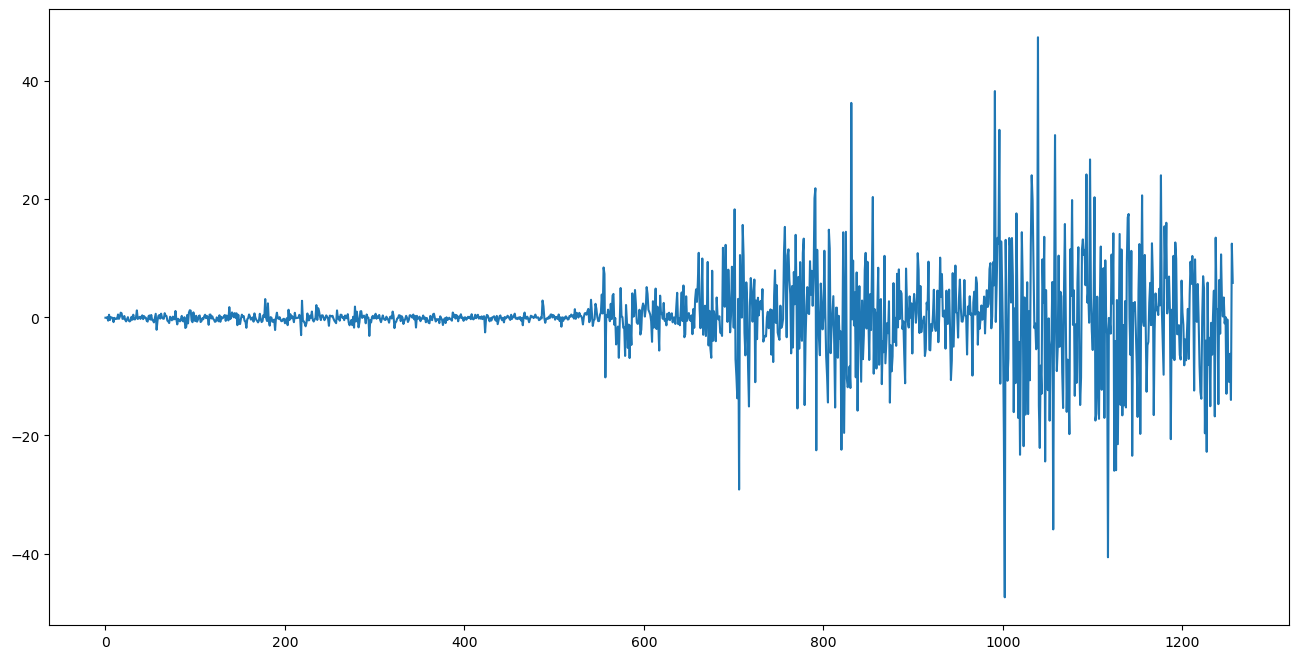

In [91]:
residuals = DataFrame(model_fit.resid)
plt.figure(figsize=(16,8))
plt.plot(residuals)

<AxesSubplot:>

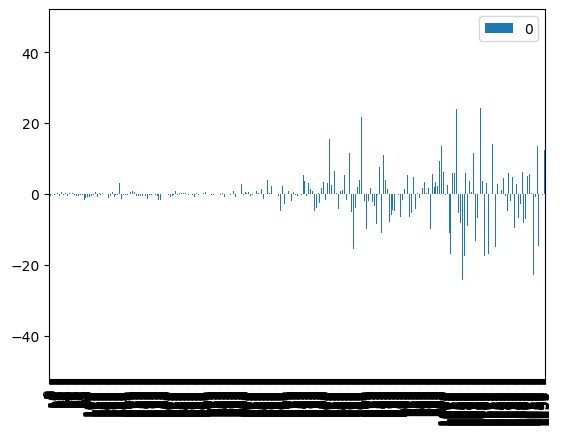

In [92]:
residuals.plot(kind='bar')

In [93]:
residuals.describe()

,0
count,1257.00
mean,0.00
std,6.86
min,-47.40
25%,-0.96
50%,-0.07
75%,1.27
max,47.43


# Machine Learning Models

In [94]:
df = pd.read_csv('/Users/anmolthadani/Desktop/Machine Learning Project/data/TSLA.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-11-15,20.40,20.83,20.10,20.75,20.75,89680500
1,2017-11-16,20.93,21.21,20.75,20.83,20.83,87331500
2,2017-11-17,21.71,21.78,20.88,21.00,21.00,206026500
3,2017-11-20,20.92,21.03,20.32,20.58,20.58,123715500
4,2017-11-21,20.72,21.22,20.58,21.19,21.19,108919500
...,...,...,...,...,...,...,...
1252,2022-11-07,208.65,208.90,196.66,197.08,197.08,93916500
1253,2022-11-08,194.02,195.20,186.75,191.30,191.30,128803400
1254,2022-11-09,190.78,195.89,177.12,177.59,177.59,127062700
1255,2022-11-10,189.90,191.00,180.03,190.72,190.72,132703000


In [95]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1257.00,1257.00,1257.00,1257.00,1257.00,1257.00
mean,128.30,131.26,125.05,128.22,128.22,131668110.26
std,119.14,121.85,116.06,118.96,118.96,90302103.83
min,12.07,12.45,11.80,11.93,11.93,29401800.00
25%,20.88,21.21,20.53,20.88,20.88,75109500.00
50%,55.63,56.40,54.12,54.68,54.68,101151000.00
75%,235.67,240.00,231.37,236.16,236.16,152224500.00
max,411.47,414.50,405.67,409.97,409.97,914082000.00


In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1257 entries, 0 to 1256
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1257 non-null   object 
 1   Open       1257 non-null   float64
 2   High       1257 non-null   float64
 3   Low        1257 non-null   float64
 4   Close      1257 non-null   float64
 5   Adj Close  1257 non-null   float64
 6   Volume     1257 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 68.9+ KB


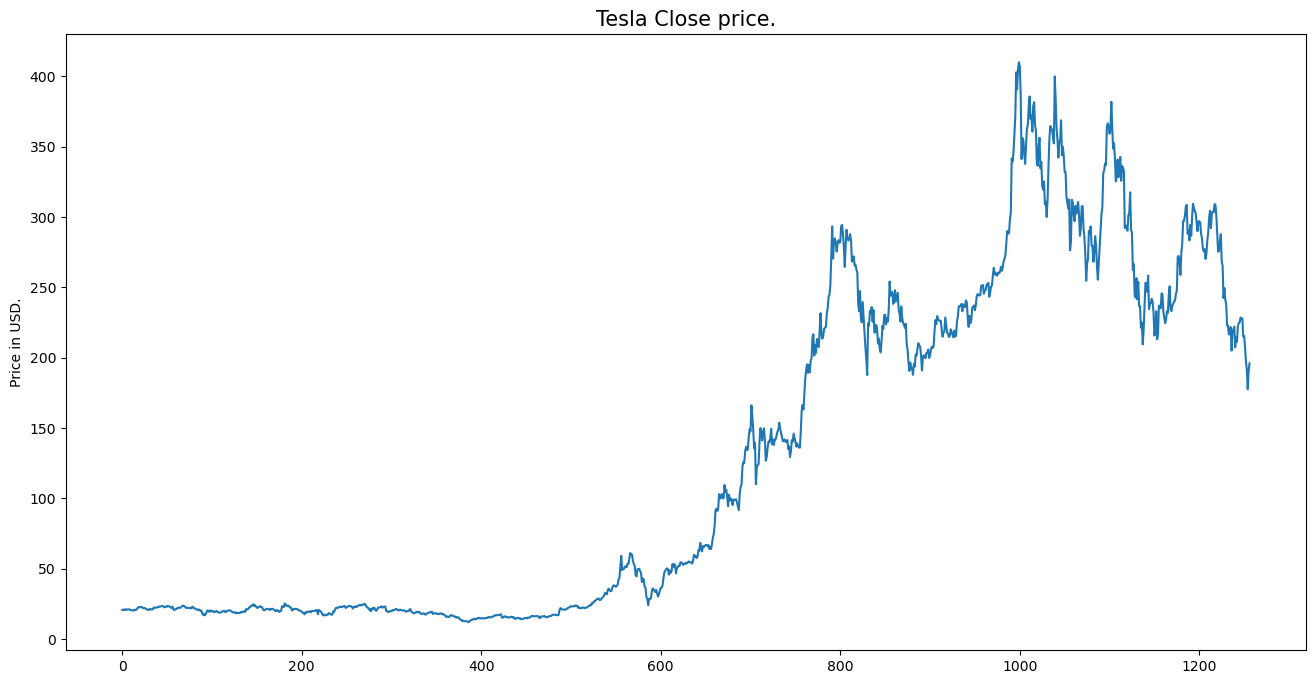

In [97]:
plt.figure(figsize=(16,8))
plt.plot(df['Close'])
plt.title('Tesla Close price.', fontsize=15)
plt.ylabel('Price in USD.')
plt.show()

In [98]:
df[df['Close'] == df['Adj Close']].shape

(1257, 7)

In [99]:
df = df.drop(['Adj Close'], axis=1)

In [100]:
df.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

/Users/anmolthadani/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/anmolthadani/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/anmolthadani/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level func

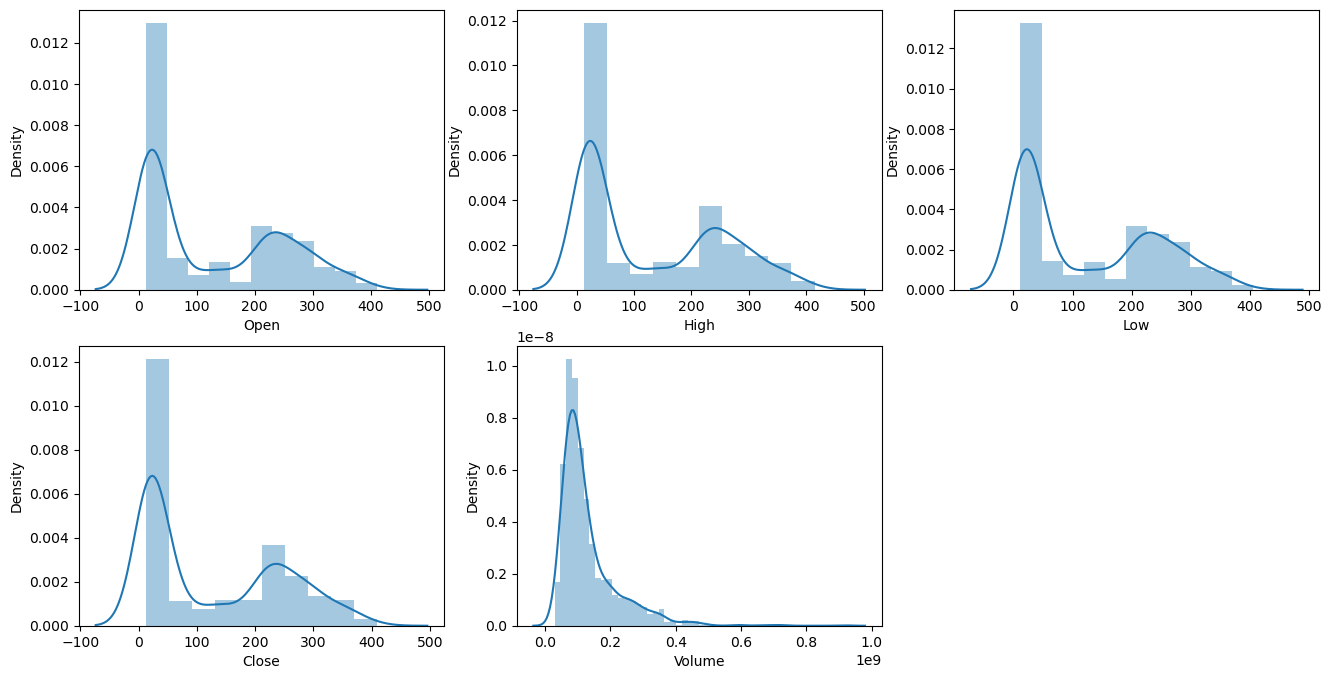

In [101]:
features = ['Open', 'High', 'Low', 'Close', 'Volume']
 
plt.subplots(figsize=(16,8))
 
for i, col in enumerate(features):
    plt.subplot(2,3,i+1)
    sns.distplot(df[col])
    
    
plt.show()

/Users/anmolthadani/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/anmolthadani/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/anmolthadani/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpr

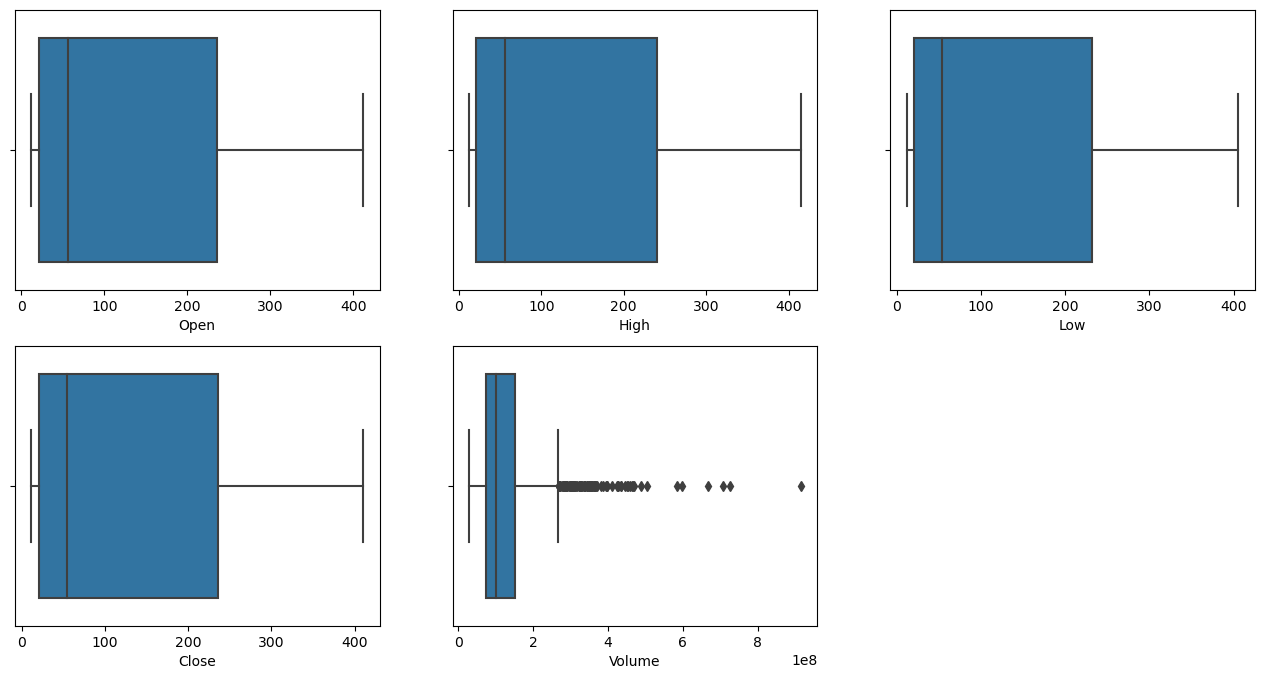

In [102]:
plt.subplots(figsize=(16,8))
for i, col in enumerate(features):
    plt.subplot(2,3,i+1)
    sns.boxplot(df[col])
plt.show()

In [103]:
df['open-close']  = df['Open'] - df['Close']
df['low-high']  = df['Low'] - df['High']
df['target'] = np.where(df['Volume'].shift(-1) > df['Volume'], 1, 0)

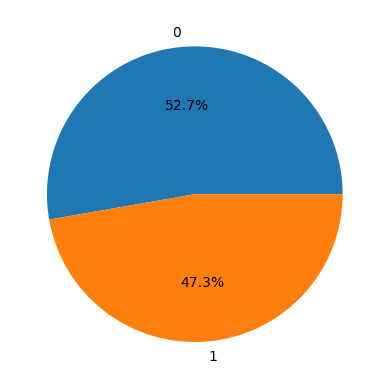

In [104]:
plt.pie(df['target'].value_counts().values,
        labels=[0, 1], autopct='%1.1f%%')
plt.show()

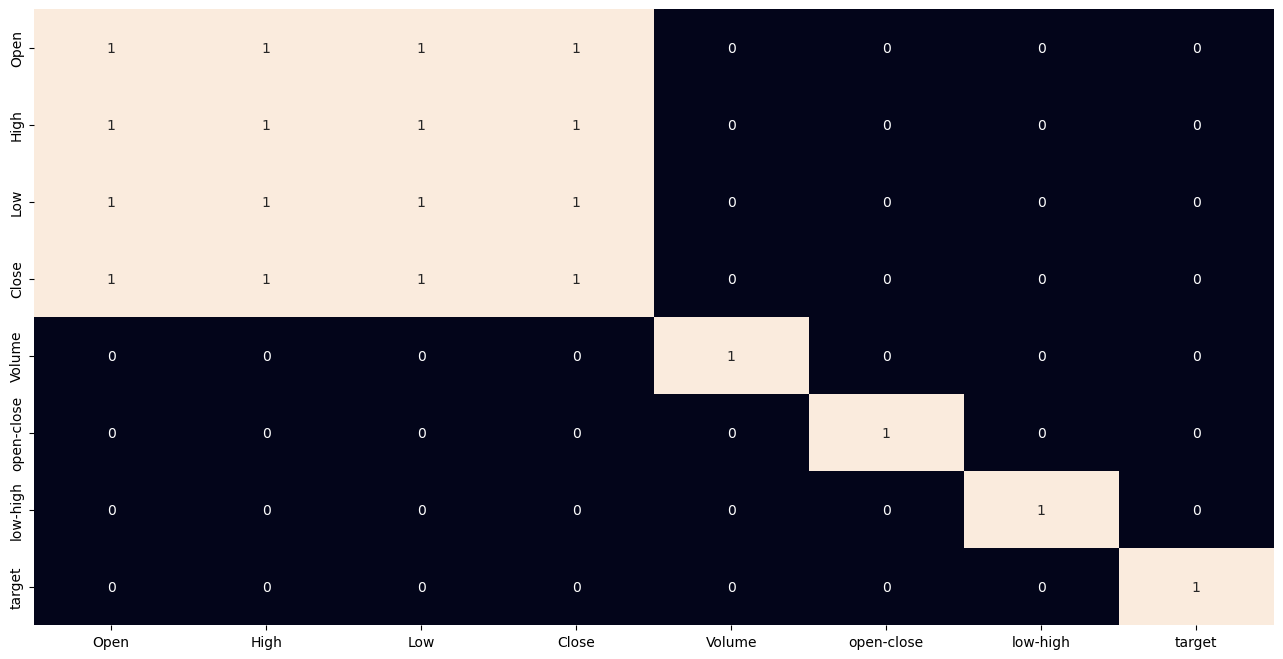

In [105]:
plt.figure(figsize=(16, 8))
sns.heatmap(df.corr() > 0.9, annot=True, cbar=False)
plt.show()

In [106]:
features = df[['open-close', 'low-high']]
target = df['target']
 
scaler = StandardScaler()
features = scaler.fit_transform(features)
 
X_train, X_test, y_train, y_test = train_test_split(
    features, target, test_size=0.5)
print(X_train.shape, X_test.shape)

(628, 2) (629, 2)


In [107]:
models = [LogisticRegression(), SVC(
  kernel='poly', probability=True), XGBClassifier()]
 
for i in range(3):
    models[i].fit(X_train, y_train)
    print(f'{models[i]} : ')
    
    print('Training Accuracy : ', metrics.roc_auc_score(
    y_train, models[i].predict_proba(X_train)[:,1]))
    
    print('Test Accuracy : ', metrics.roc_auc_score(
    y_test, models[i].predict_proba(X_test)[:,1]))

    
print()

LogisticRegression() : 
Training Accuracy :  0.5528719758580124
Test Accuracy :  0.5505258899676375
SVC(kernel='poly', probability=True) : 
Training Accuracy :  0.5200552401411692
Test Accuracy :  0.5594862459546925
XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...) : 
Training Accuracy :  0.9969924812030075
Test Accuracy :  0.51257584

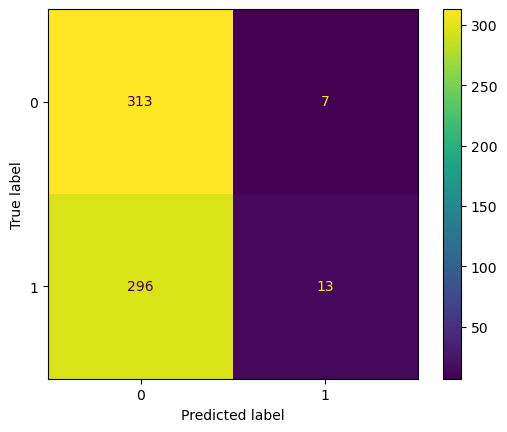

In [108]:
metrics.plot_confusion_matrix(models[0], X_test, y_test)
plt.show()

In [109]:
pca = PCA(n_components = 2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [110]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.53732762, 0.46267238])

In [111]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train_pca,y_train)
y_pred_rf_pca = rf.predict(X_test_pca)

In [112]:
pca_accuracy = accuracy_score(y_test, y_pred_rf_pca)
print('Accuracy is: ', pca_accuracy*100)
print(classification_report(y_test,y_pred_rf_pca))

Accuracy is:  55.16693163751988
              precision    recall  f1-score   support

           0       0.55      0.62      0.58       320
           1       0.55      0.48      0.51       309

    accuracy                           0.55       629
   macro avg       0.55      0.55      0.55       629
weighted avg       0.55      0.55      0.55       629

